# Исследование на тему: "Выявление перспективных источников трафика в сервисе по продаже билетов на развлекательные мероприятия "Яндекс-Афиша" за период 06.2017 - 05.2018"

В нашем распоряжении есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

**Цель:**

- помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Нам предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

**Ход исследования:**

Шаг 1. Загрузим данные и подготовим их к анализу
- 1.1. Положим данные о визитах, заказах и рекламных расходах в переменные;
- 1.2. Подготовим данные. Убедимся, что тип данных во всех колонках соответствует сохранённым в них значениям.

Пути к файлам:
- визиты: /datasets/visits_log.csv. Скачать датасет
- заказы: /datasets/orders_log.csv. Скачать датасет
- расходы: /datasets/costs.csv. Скачать датасет

Шаг 2. Рассчитаем метрики и построим графики
Посчитаем метрики трёх видов:
- продуктовые,
- метрики электронной коммерции,
- маркетинговые.

Отобразим на графиках изменения каждой метрики во времени. Всякий раз постараемся подобрать наиболее подходящий тип визуализации: в некоторых случаях может быть уместна тепловая карта когортного анализа.
После каждого пункта сформулируем выводы.
Как рассчитать метрики
- 2.1. Продуктовые метрики
    - 2.1.1. Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период. Отобразим изменения метрик во времени на графиках;
    - 2.1.2. Определим, сколько раз за день пользователи в среднем заходят на сайт. Построим график, отражающий изменения метрики во времени;
    - 2.1.3. Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения. Изменение продолжительности сессий во времени изучать необязательно;
    - 2.1.4. Рассчитаем Retention Rate, применяя когортный анализ. Покажем изменения метрики во времени на графике. Найдём средний Retention Rate на второй месяц «жизни» когорт.
- 2.2. Метрики электронной коммерции
    - 2.2.1. Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;
    - 2.2.2. Применяя когортный анализ или другой метод, рассчитаем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;
    - 2.2.3. Рассчитаем средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Построим график, отражающий изменения метрики во времени;
    - 2.2.4. Выясним, как меняется LTV на покупателя по когортам. Помним, что LTV — накопительная метрика. Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт будем включать когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразим изменения метрики во времени на графике;


Посчитаем и отобразим на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.
- 2.3. Маркетинговые метрики
    - 2.3.1. Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени;
    - 2.3.2. Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразим изменения метрик на графиках;
    - 2.3.3. Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. Обратим внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Построим графики, отражающие изменения метрик во времени.
    
Шаг 3. Сформулируем выводы и рекомендации
- 3.1. Определим источники трафика, на которые маркетологам стоит делать упор. Объясним свой выбор: на какие метрики мы ориентируемся и почему;
- 3.2. Опишем выводы, которые мы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;
- 3.3. Подведём итоги когортного анализа. Определим самые перспективные для компании когорты клиентов;

---

***Далее по тексту, слова "столбец" и "колонка" следует считать синонимами

## Шаг 1. Изучение данных из файлов, подготовка данных к анализу.

Импортируем полезные инструменты

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np

Отключим ненужные предупреждения Питона

In [4]:
import warnings
warnings.filterwarnings('ignore')

Сбросим ограничения на демонстрацию количества столбцов, зададим максималное количество символов в каждой строке, а также округлим выведение значений типа float до двух знаков после запятой.

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 80)
pd.options.display.float_format = '{:,.2f}'.format

Импортируем библиотеку для получения запросов. Нам она пригодится при скачивании картинок

In [6]:
import requests
from ipywidgets import Image

Откроем файлы с таблицами

In [7]:
visits = pd.read_csv('/datasets/visits_log.csv')

Выведем первые 10 строк таблицы visits

In [8]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


Из описания данных нам известно, что файл visits_log.csv хранит лог сервера с информацией о посещениях сайта. Полезно было бы также раскрыть его структуру.

Структура visits_log.csv
- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор источника перехода на сайт.

Получим дополнительную информацию о таблице.

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Какая приятная таблица - никаких пропущенных значений. Посмотрим внимательнее на типы. Тип uint64 - u означает unsigned, то есть в этом типе данных могут храниться только неотрицательные числа. Вряд ли это каким-то образом нам помешает. Оставим столбец Uid в первоначальном виде. Колонка Device - в ней значения типа object. Тоже замечательно. Source Id - колонка с идентификатором источника перехода на сайт, тип данных - int64 - отлично! Остались только столбцы с датой и временем начала и окончния сессии (Start Ts и End Ts). Тип данных - object. Исправим это.

In [10]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [11]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


С типами разобрались. Теперь переименуем столбцы. Будем придерживаться общепринятых стандартов - pep-8 рекомендует переменные именовать в snake_case. Да и названия с заглавных букв несколько режут взгляд.

In [13]:
df_columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits.set_axis(df_columns, axis = 'columns', inplace = True)

In [14]:
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

И переместим их очередность для лучшей логической связки

In [15]:
visits = visits.reindex(columns=['device','start_ts','end_ts','uid','source_id'])

In [16]:
visits.head()

,device,start_ts,end_ts,uid,source_id
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,16879256277535980062,4
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,104060357244891740,2
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,5
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,16174680259334210214,9
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,3


Проведём те же операции над оставшимися двумя таблицами.

In [17]:
orders = pd.read_csv('/datasets/orders_log.csv')

In [18]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


orders_log.csv — информация о заказах

Структура orders_log.csv
- Uid — уникальный идентификатор пользователя,
- Buy Ts — дата и время заказа,
- Revenue — сумма заказа.

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Приведём значения столбца Buy Ts к типу datetime

In [20]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Изменим названия столбцов

In [22]:
df_columns = ['buy_ts', 'revenue', 'uid']
orders.set_axis(df_columns, axis = 'columns', inplace = True)

In [23]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Перейдём к оставшейся таблице

In [24]:
costs = pd.read_csv('/datasets/costs.csv')

In [25]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


costs.csv — информация о расходах на маркетинг.

Структура costs.csv
- source_id — идентификатор рекламного источника,
- dt — дата проведения рекламной кампании,
- costs — расходы на эту кампанию.

In [26]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Приведём значения колонки dt к типу datetime. Названия колонок представляются адекватными и изменений не требуют.

In [27]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [28]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


На всякий случай проверим таблицы на наличие дубликатов

In [29]:
costs.duplicated().sum()

0

In [30]:
orders.duplicated().sum()

0

In [31]:
visits.duplicated().sum()

0

Напоследок посмотрим на два столбца, которые вызывают вопросы. Результаты предстоящего наблюдения обсудим в ближайших выводах.

In [32]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [33]:
visits['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

### Выводы:

- Таблицы приведены к адекватным для дальнейшей работы типам данных;
- Названия колонок изменены в соответствии со стандартами pep-8 и удобством дальнейшего использования;
- Пропуски и дубликаты в таблицах не обнаружены;
- Столбец таблицы visits 'source_id' - идентификатор источника перехода на сайт и такой же столбец таблицы costs - идентификатор рекламного источника, представляют собой набор целых чисел от 1 до 10 с некоторыми пропусками (в visits пропущена цифра 8, в costs пропущены 6, 7, 8). Поскольку не указаны источники перехода на сайт (описание данных и самостоятельные поиски также не привели к получению универсальных цифровых аналогов в виде источников), принято решение принимать каждое числовое значение в качестве заменителя **имени** источника перехода. Впрочем, если в ходе дальнейшего исследования тем или иным образом ситуация изменится (например, дальнейшие поиски в Сети дадут универсальные цифровые аналоги в виде источников), цифровой ряд обязательно идентифицируется.  

## Расчёт метрик и построение графиков

Посчитаем метрики трёх видов:
- продуктовые,
- метрики электронной коммерции,
- маркетинговые.

Отобразим на графиках изменения каждой метрики во времени. Всякий раз постараемся подобрать наиболее подходящий тип визуализации: в некоторых случаях может быть уместна тепловая карта когортного анализа.
После каждого пункта сформулируем выводы.
Как рассчитать метрики
- 2.1. Продуктовые метрики
    - 2.1.1. Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период. Отобразим изменения метрик во времени на графиках;
    - 2.1.2. Определим, сколько раз за день пользователи в среднем заходят на сайт. Построим график, отражающий изменения метрики во времени;
    - 2.1.3. Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения. Изменение продолжительности сессий во времени изучать необязательно;
    - 2.1.4. Рассчитаем Retention Rate, применяя когортный анализ. Покажем изменения метрики во времени на графике. Найдём средний Retention Rate на второй месяц «жизни» когорт.
- 2.2. Метрики электронной коммерции
    - 2.2.1. Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;
    - 2.2.2. Применяя когортный анализ или другой метод, рассчитаем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;
    - 2.2.3. Рассчитаем средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Построим график, отражающий изменения метрики во времени;
    - 2.2.4. Выясним, как меняется LTV на покупателя по когортам. Помним, что LTV — накопительная метрика. Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт будем включать когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразим изменения метрики во времени на графике;


Посчитаем и отобразим на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.
- 2.3. Маркетинговые метрики
    - 2.3.1. Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени;
    - 2.3.2. Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразим изменения метрик на графиках;
    - 2.3.3. Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. Обратим внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Построим графики, отражающие изменения метрик во времени.

### Продуктовые метрики

#### Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период. Отобразим изменения метрик во времени на графиках

In [34]:
visits.head()

,device,start_ts,end_ts,uid,source_id
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,16879256277535980062,4
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,104060357244891740,2
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,5
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,16174680259334210214,9
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,3


Рассчитаем DAU, WAU и MAU
Выделим в отдельные столбцы год, месяц, неделю и день, а также полную дату.

In [35]:
visits['year']  = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week']  = visits['start_ts'].dt.week
visits['day']  = visits['start_ts'].dt.day
visits['date'] = visits['start_ts'].dt.date
visits.head()

,device,start_ts,end_ts,uid,source_id,year,month,week,day,date
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,16879256277535980062,4,2017,12,51,20,2017-12-20
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,104060357244891740,2,2018,2,8,19,2018-02-19
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,5,2017,7,26,1,2017-07-01
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,16174680259334210214,9,2018,5,20,20,2018-05-20
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,3,2017,12,52,27,2017-12-27


In [36]:
DAU = visits.groupby('date').agg({'uid': 'nunique'}).mean()
print(f'Ежедневная аудитория DAU {int(DAU)} человек')

Ежедневная аудитория DAU 907 человек


In [37]:
WAU = visits.groupby('week').agg({'uid': 'nunique'}).mean()
print(f'Еженедельная аудитория WAU {int(WAU)} человек')

Еженедельная аудитория WAU 5825 человек


In [38]:
MAU = visits.groupby('month').agg({'uid': 'nunique'}).mean()
print(f'Ежемесячная аудитория MAU {int(MAU)} человек')

Ежемесячная аудитория MAU 23228 человек


Отобразим изменения метрик во времени на графиках.
Для начала выведем количество уникальных посещений по годам и месяцам. 

Text(0, 0.5, 'Количество посетителей')

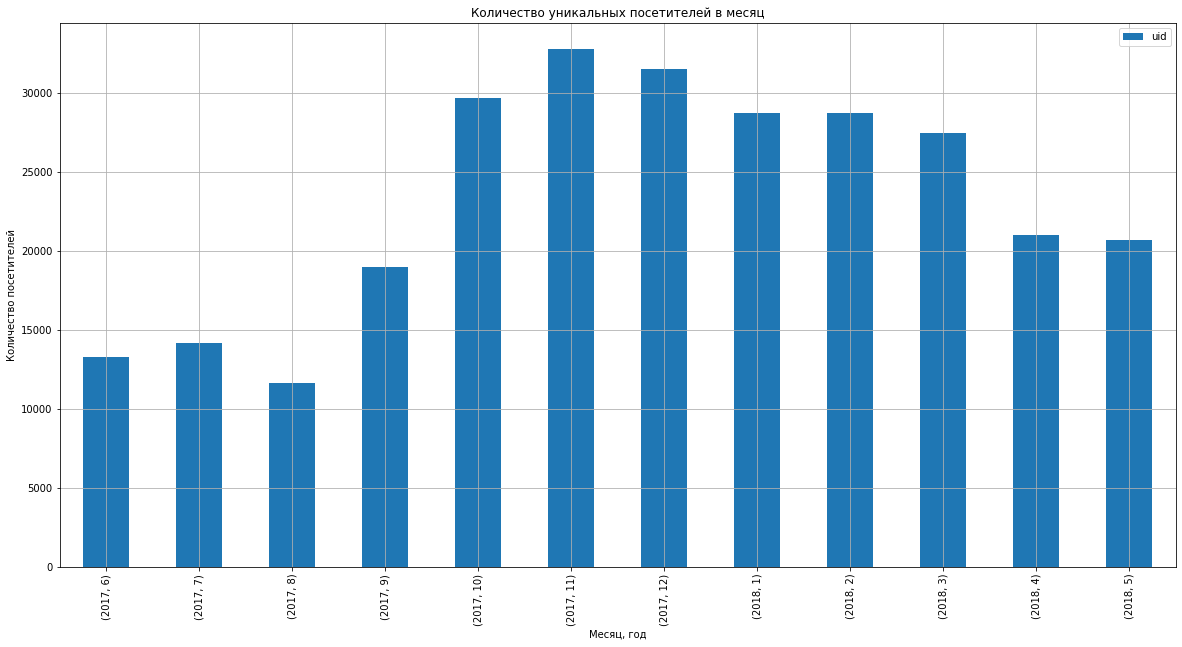

In [39]:
month_of_visit = visits.groupby(['year', 'month']).agg({'uid': 'nunique'})
month_of_visit.plot(
    kind='bar',
    grid=True,
    figsize=(20, 10))

plt.title('Количество уникальных посетителей в месяц')
plt.xlabel('Месяц, год') 
plt.ylabel('Количество посетителей')    

Ноябрь 2017 показывает максимум по посещениям, август - минимум. Взрывной рост посещений посетителей происходит начиная с октября 2017. Явное снижение посещений происходит с апреля 2018.

Для лучшего понимания номеров недель 2017 и 2018 годов скачаем из Яндекс-Картинок календари.

<img src=https://i.pinimg.com/originals/d7/51/b6/d751b67a7062b8961ddcbe1f298c44af.jpg>

<img src=https://3mu.ru/wp-content/uploads/2017/08/Calendar-2018-s-nomerami-nedel.jpg>

Посмотрим на посещения посетителей по неделям

Text(0, 0.5, 'Количество посетителей')

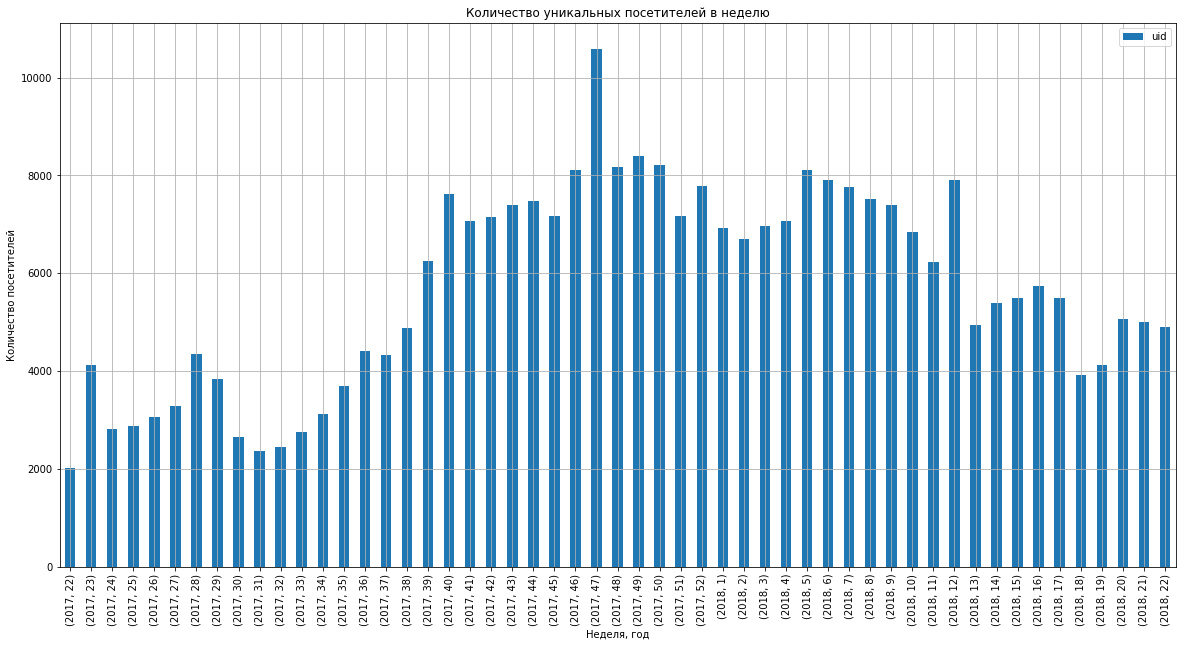

In [42]:
visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).plot(
    kind='bar',
    grid=True,
    figsize=(20, 10))

plt.title('Количество уникальных посетителей в неделю')
plt.xlabel('Неделя, год') 
plt.ylabel('Количество посетителей')   

Определилась неделя - лидер по посещениям. Это 47-я неделя - середина ноября. Может на эту лидирующую неделю оказывает влияние какой-то лидирующий по посещениям день? Неделя с минимальным количеством посещений - 22 неделя. Впрочем, если посмотреть на календарь, то можно увидеть, что в эту неделю попадает всего 4 первых дня июня.

Взглянем на посещения уникальных посетителей по дням

Text(0, 0.5, 'Количество посетителей')

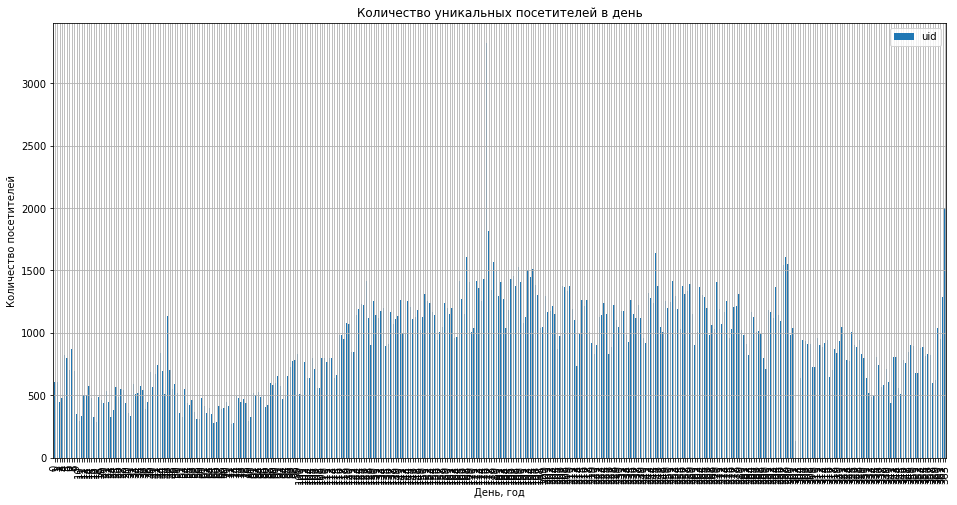

In [43]:
day_of_visit = visits.groupby('date').agg({'uid': 'nunique'}).reset_index()
day_of_visit.plot(
    kind='bar',
    grid=True,
    figsize=(16, 8))

plt.title('Количество уникальных посетителей в день')
plt.xlabel('День, год') 
plt.ylabel('Количество посетителей')

Получилась красивая визуализация похожая на штрих-код. К сожалению малоинформативная. Попробуем визуализировать иначе.

In [44]:
print(month_of_visit)

              uid
year month       
2017 6      13259
     7      14183
     8      11631
     9      18975
     10     29692
     11     32797
     12     31557
2018 1      28716
     2      28749
     3      27473
     4      21008
     5      20701


In [45]:
def drow_day(y, m, title):
    day_with_month = visits[(visits['year'] == y) & (visits['month'] == m)]
    day_with_month = day_with_month.groupby(['year', 'date']).agg({'uid': 'nunique'})
    day_with_month.plot(
    kind='bar',
    grid=True,
    figsize=(16, 8))

    plt.title(title)
    plt.xlabel('День, год') 
    plt.ylabel('Количество посетителей')
    
        
    
    

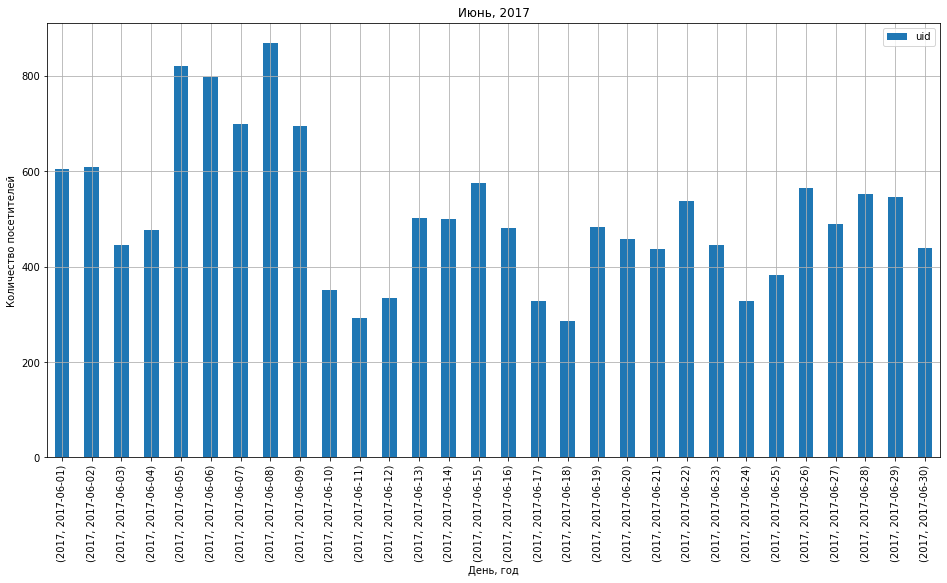

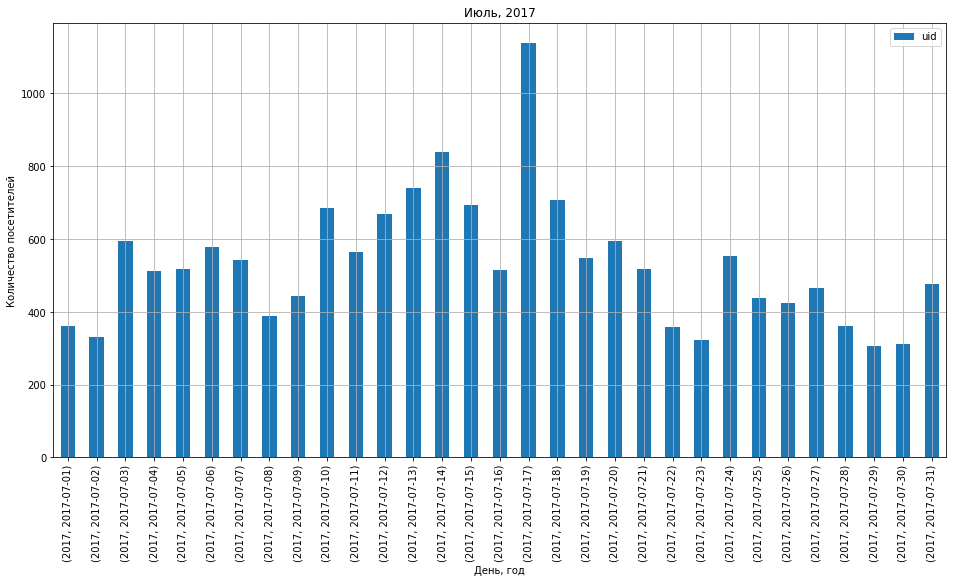

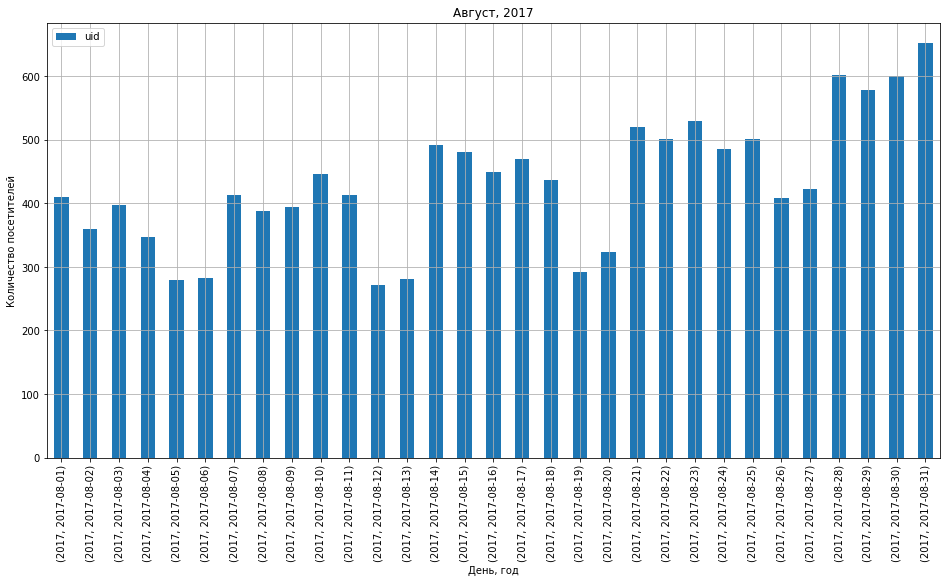

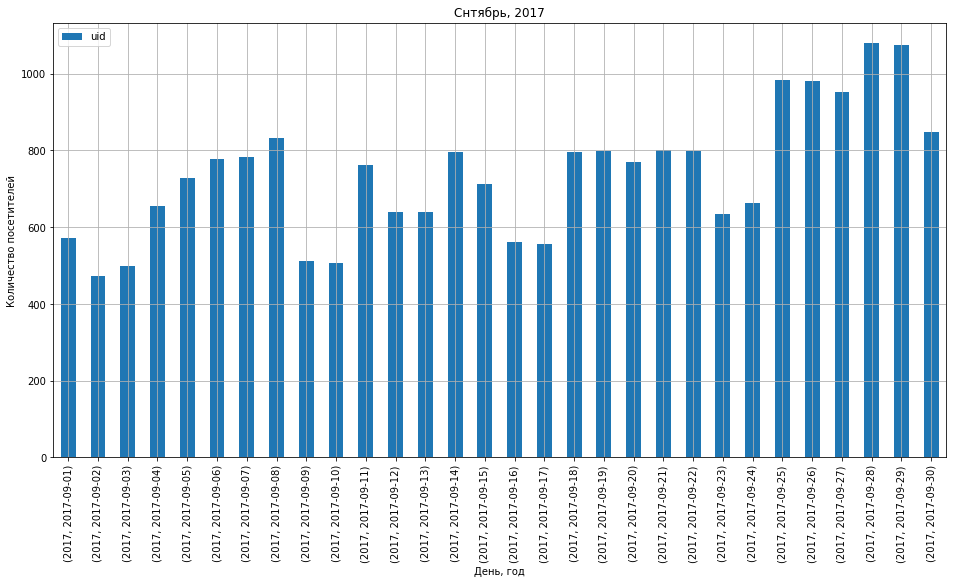

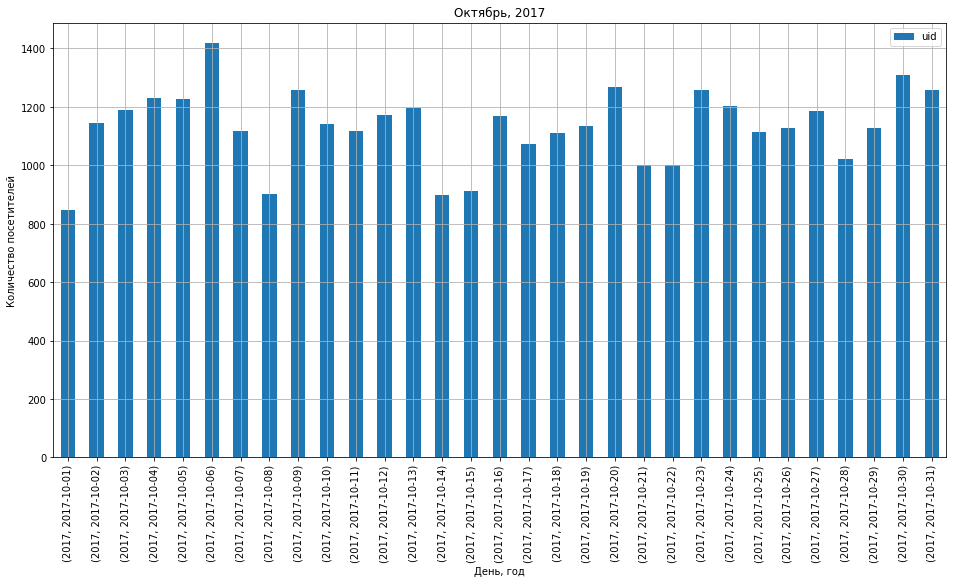

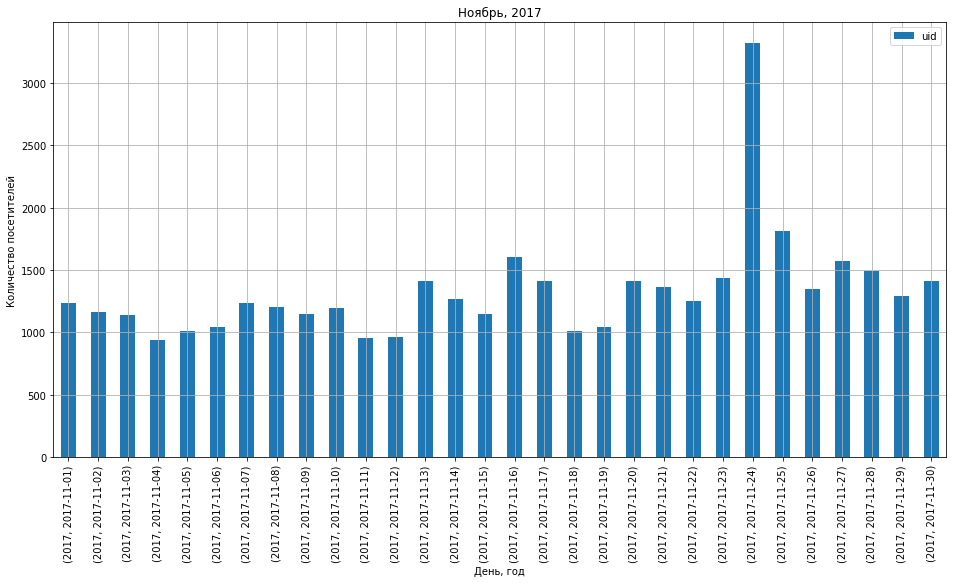

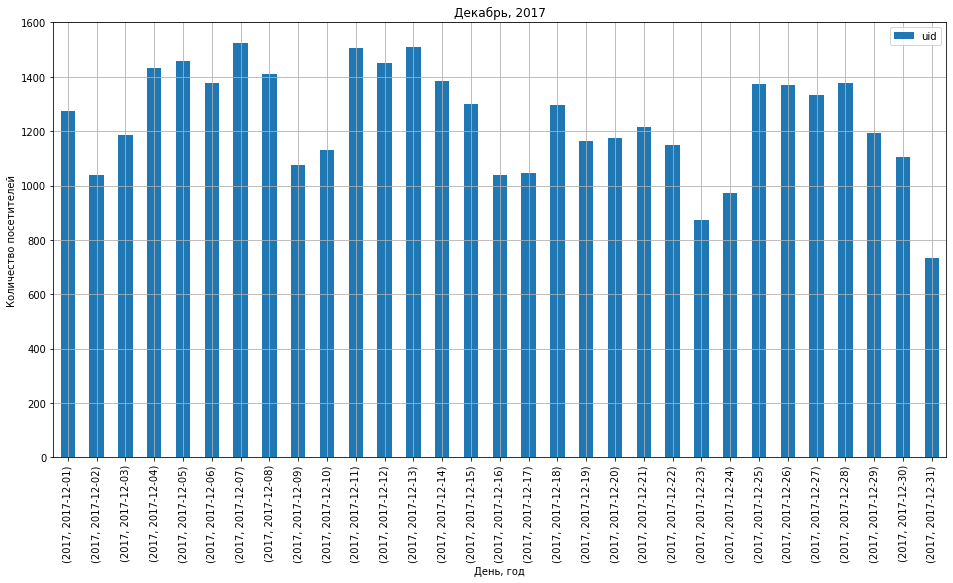

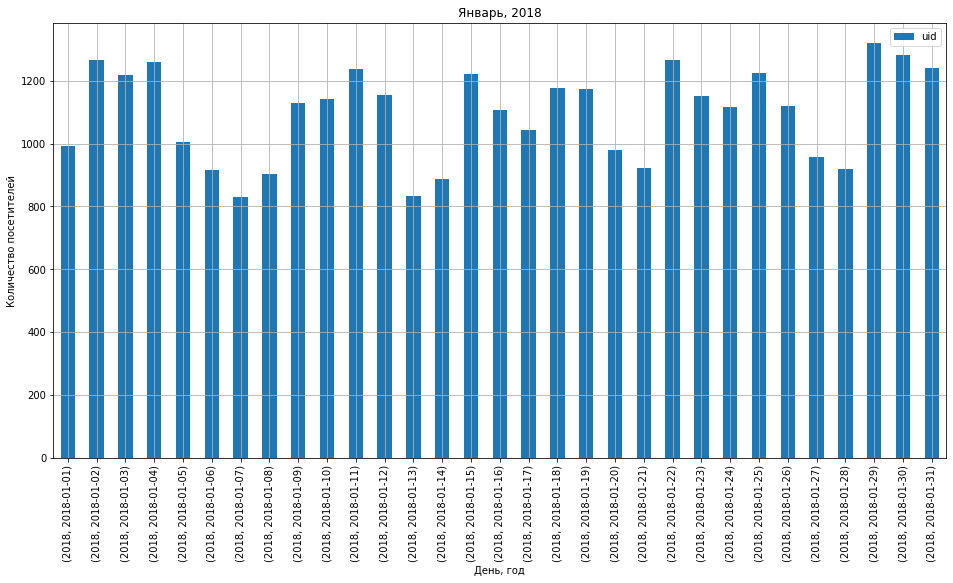

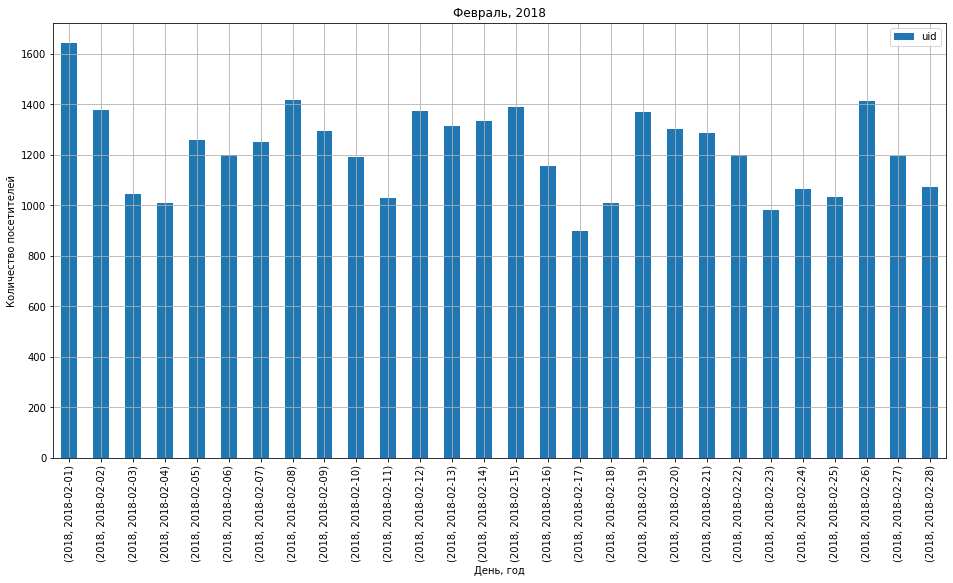

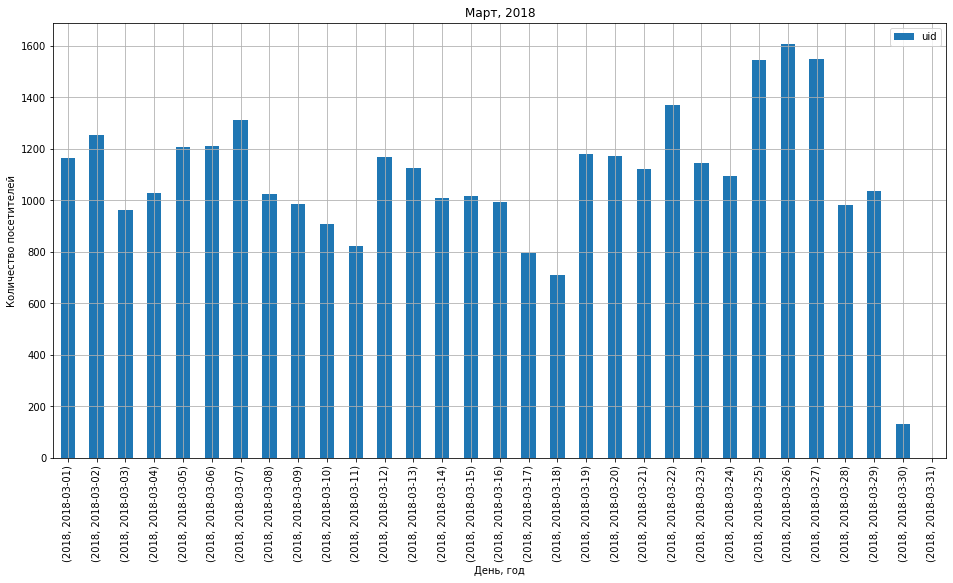

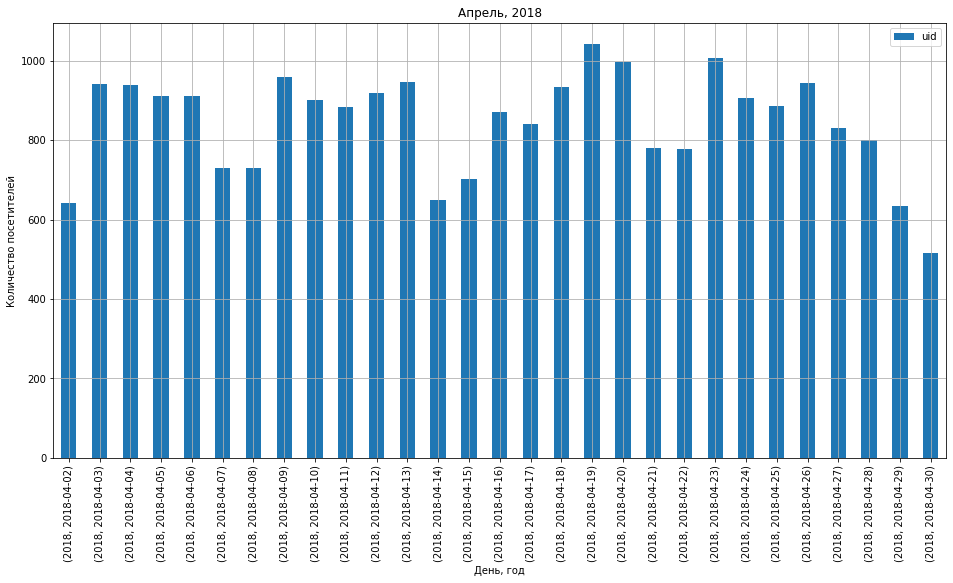

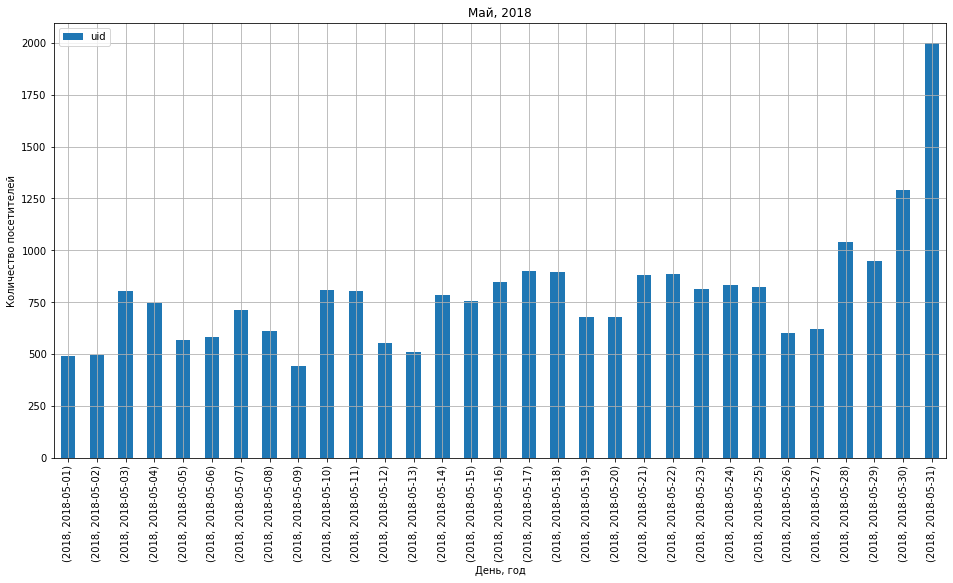

In [46]:
data_of_date = [[2017,6,'Июнь, 2017'],[2017,7,'Июль, 2017'],[2017,8,'Август, 2017'],
                [2017,9,'Снтябрь, 2017'],[2017,10,'Октябрь, 2017'],[2017,11,'Ноябрь, 2017'],
                [2017,12,'Декабрь, 2017'],[2018,1,'Январь, 2018'],[2018,2,'Февраль, 2018'],
                [2018,3,'Март, 2018'],[2018,4,'Апрель, 2018'],[2018,5,'Май, 2018']]
for i, j, k in data_of_date:
    drow_day(i, j, k)

На сей раз графики вышли очень подробными и наглядными, но трудными для восприятия. Оставим их для извлечения из них полезной информации, но добавим ещё один график.

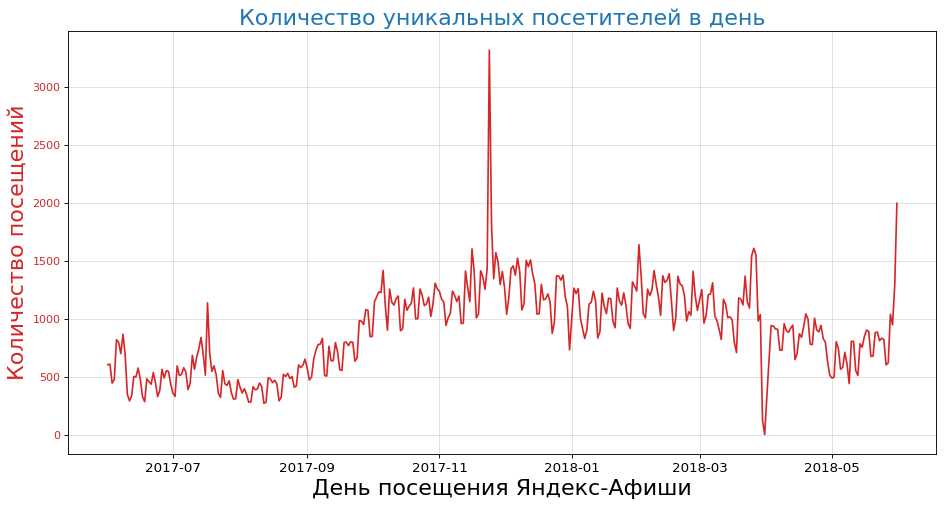

In [47]:
x = day_of_visit['date']
y = day_of_visit['uid']
fig, ax = plt.subplots(1,1,figsize=(14,7), dpi= 80)
ax.plot(x, y, color='tab:red')

ax.set_title('Количество уникальных посетителей в день', color='tab:blue', fontsize=20)
ax.set_xlabel('День посещения Яндекс-Афиши', fontsize=20)
ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.set_ylabel('Количество посещений', color='tab:red', fontsize=20)
ax.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax.grid(alpha=.4)
plt.show()

In [48]:
visits[(visits['month'] == 11) & (visits['day'] == 24)].agg({'uid':'nunique'})

uid    3319
dtype: int64

In [49]:
visits[(visits['month'] == 5) & (visits['day'] == 31)].agg({'uid':'nunique'})

uid    1997
dtype: int64

In [50]:
visits[(visits['month'] == 3) & (visits['day'] == 30)].agg({'uid':'nunique'})

uid    131
dtype: int64

Несомненно, какое-то очень интересное мероприятие происходило 24 ноября 2017 года, в этот день афишу посетило 3319 человек. На втором месте по популярности нечто, произошедшее 31 мая 2018 года. В этот день афишу посетило 1997 человек. Минимальное количество посещений зафиксировано 30 марта 2018 года - всего 131 визит.

---

#### 2.1.2. Определим, сколько раз за день пользователи в среднем заходят на сайт. Построим график, отражающий изменения метрики во времени;

In [51]:
visits.head()

,device,start_ts,end_ts,uid,source_id,year,month,week,day,date
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,16879256277535980062,4,2017,12,51,20,2017-12-20
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,104060357244891740,2,2018,2,8,19,2018-02-19
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,5,2017,7,26,1,2017-07-01
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,16174680259334210214,9,2018,5,20,20,2018-05-20
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,3,2017,12,52,27,2017-12-27


In [52]:
sessions_per_user = visits.groupby('date').agg({'uid': ['count', 'nunique']}).reset_index()
sessions_per_user.columns = ['date', 'n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print('Один пользователь сайта посещает его в среднем', sessions_per_user['sess_per_user'].mean(), 'раз в день')

Один пользователь сайта посещает его в среднем 1.082169644003972 раз в день


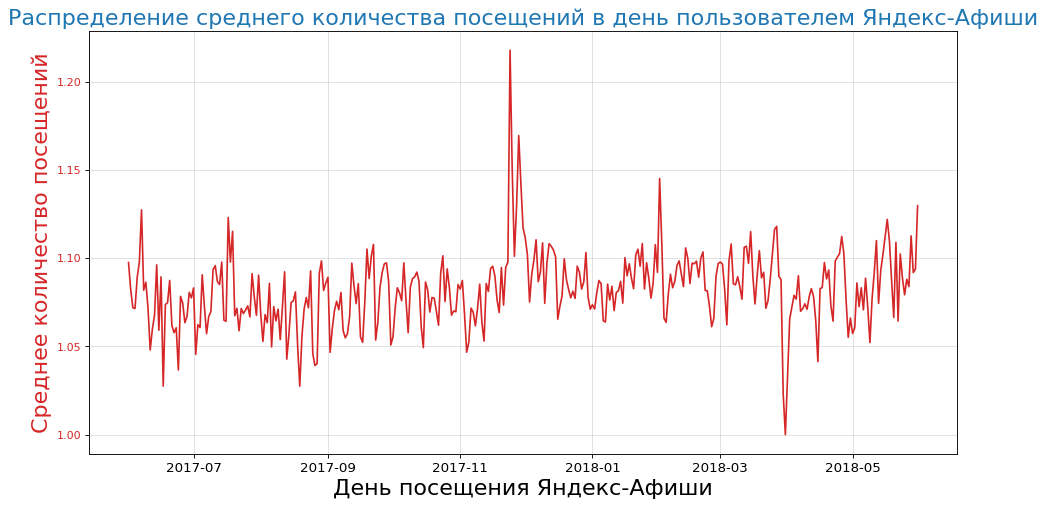

In [53]:
x = sessions_per_user['date']
y = sessions_per_user['sess_per_user']
fig, ax = plt.subplots(1,1,figsize=(14,7), dpi= 80)
ax.plot(x, y, color='tab:red')

ax.set_title('Распределение среднего количества посещений в день пользователем Яндекс-Афиши', color='tab:blue', fontsize=20)
ax.set_xlabel('День посещения Яндекс-Афиши', fontsize=20)
ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.set_ylabel('Среднее количество посещений', color='tab:red', fontsize=20)
ax.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax.grid(alpha=.4)
plt.show()

Как видим, данный график достаточно похож на предыдущий, связанный с количеством посетителей на сайт. Те же максимальные и минимальные выбросы. Видимо, яркие мероприятия влияют не только на количество посетителей, но, пропорционально, и на количество посещений одного пользователя.

---

#### 2.1.3. Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения. Изменение продолжительности сессий во времени изучать необязательно;

In [54]:
visits['session_minutes_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

In [55]:
visits['session_minutes_duration'].describe()

count   359,400.00
mean         10.72
std          16.62
min         -46.00
25%           2.00
50%           5.00
75%          14.00
max         711.00
Name: session_minutes_duration, dtype: float64

В минимальных показателях мы видим отрицательные значения продолжительности одной сессии. Такой результат может исказить реальную картину происходящего. Исправим это.

In [56]:
visits = visits.query('session_minutes_duration >= 0')

In [57]:
visits['session_minutes_duration'].describe()

count   359,398.00
mean         10.72
std          16.62
min           0.00
25%           2.00
50%           5.00
75%          14.00
max         711.00
Name: session_minutes_duration, dtype: float64

In [58]:
print('Средняя продолжительность посещения сайта составляет', visits['session_minutes_duration'].mean(), 'минут')

Средняя продолжительность посещения сайта составляет 10.717371456342736 минут


In [59]:
print('Медианная продолжительность посещения сайта составляет', visits['session_minutes_duration'].median(), 'минут')

Медианная продолжительность посещения сайта составляет 5.0 минут


Построим график распределения времени посещения Яндекс-Афиши.

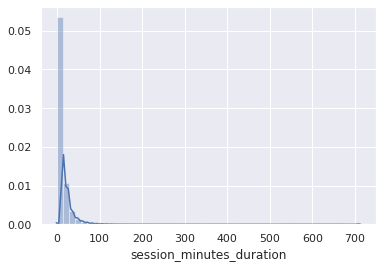

In [60]:
sns.set(style="darkgrid")
sns.distplot(visits['session_minutes_duration'])
plt.show()

Распределение не является нормальным, соответственно, необходимо обращать внимание не на среднее или медиану, а на моду.

In [61]:
print('Модная продолжительность посещения сайта составляет', visits['session_minutes_duration'].mode(), 'минуту')

Модная продолжительность посещения сайта составляет 0   1.00
dtype: float64 минуту


Значение в выборке, которое встречается чаще всего составляет одну минуту. 

---

#### 2.1.4. Рассчитаем Retention Rate, применяя когортный анализ. Покажем изменения метрики во времени на графике. Найдём средний Retention Rate на второй месяц «жизни» когорт.


In [62]:
visits.head()

,device,start_ts,end_ts,uid,source_id,year,month,week,day,date,session_minutes_duration
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,16879256277535980062,4,2017,12,51,20,2017-12-20,18.00
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,104060357244891740,2,2018,2,8,19,2018-02-19,28.00
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,5,2017,7,26,1,2017-07-01,0.00
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,16174680259334210214,9,2018,5,20,20,2018-05-20,24.00
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,3,2017,12,52,27,2017-12-27,0.00


Сгруппируем данные по столбцу 'uid' методом groupby(). Для каждого клиента получим дату его первого посещения — ['date'].min()

In [63]:
first_visit_date_by_customers = visits.groupby('uid')[
    'date'
].min()
first_visit_date_by_customers

uid
11863502262781          2018-03-01
49537067089222          2018-02-06
297729379853735         2017-06-07
313578113262317         2017-09-18
325320750514679         2017-09-30
                           ...    
18446403737806311543    2017-11-30
18446424184725333426    2017-12-06
18446556406699109058    2018-01-01
18446621818809592527    2017-12-27
18446676030785672386    2017-10-04
Name: date, Length: 228169, dtype: object

Чтобы в результирующем датафрейме не было двух столбцов с одинаковыми названиями, изменим имя Series на first_visit_date, обратившись к атрибуту name у Series.

In [64]:
first_visit_date_by_customers.name = 'first_visit_date'

Методом join() объединим датафрейм visits и Series first_visit_date_by_customers по столбцу 'uid':

In [65]:
visits = visits.join(first_visit_date_by_customers, on='uid')

In [66]:
visits.head()

,device,start_ts,end_ts,uid,source_id,year,month,week,day,date,session_minutes_duration,first_visit_date
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,16879256277535980062,4,2017,12,51,20,2017-12-20,18.00,2017-12-20
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,104060357244891740,2,2018,2,8,19,2018-02-19,28.00,2018-02-19
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,5,2017,7,26,1,2017-07-01,0.00,2017-07-01
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,16174680259334210214,9,2018,5,20,20,2018-05-20,24.00,2018-03-09
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,3,2017,12,52,27,2017-12-27,0.00,2017-12-27


Выделим из столбца first_visit_date месяцы

In [67]:
visits['first_visit_month'] = visits['first_visit_date'].astype(
    'datetime64[M]'
)
visits['month'] = visits['date'].astype(
    'datetime64[M]'
)

In [68]:
visits.head()

,device,start_ts,end_ts,uid,source_id,year,month,week,day,date,session_minutes_duration,first_visit_date,first_visit_month
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,16879256277535980062,4,2017,2017-12-01,51,20,2017-12-20,18.00,2017-12-20,2017-12-01
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,104060357244891740,2,2018,2018-02-01,8,19,2018-02-19,28.00,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,5,2017,2017-07-01,26,1,2017-07-01,0.00,2017-07-01,2017-07-01
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,16174680259334210214,9,2018,2018-05-01,20,20,2018-05-20,24.00,2018-03-09,2018-03-01
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,3,2017,2017-12-01,52,27,2017-12-27,0.00,2017-12-27,2017-12-01


Создадим столбец «жизни» когорт

In [69]:
visits['lifetime'] = visits['month'] - visits['first_visit_month']
visits['lifetime'] = (visits['lifetime'] / np.timedelta64(1, 'M')).round().astype('int')

In [70]:
cohorts = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
cohorts.head(10)

,first_visit_month,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
5,2017-06-01,5,947
6,2017-06-01,6,809
7,2017-06-01,7,766
8,2017-06-01,8,694
9,2017-06-01,9,674


In [71]:
cohorts['first_visit_month'].dt.strftime('%d.%m.%Y') 

0     01.06.2017
1     01.06.2017
2     01.06.2017
3     01.06.2017
4     01.06.2017
         ...    
73    01.03.2018
74    01.03.2018
75    01.04.2018
76    01.04.2018
77    01.05.2018
Name: first_visit_month, Length: 78, dtype: object

Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:

In [72]:
initial_users_count = cohorts[cohorts['lifetime'] == 0][
    ['first_visit_month', 'uid']]

In [73]:
initial_users_count

,first_visit_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Переименуем столбец uid в cohort_users методом rename(). Параметру columns передадим словарь, где ключ — старое название столбца, а значение — новое:

In [74]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

Объединим данные по когортам с исходным количеством пользователей в когорте:

In [75]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')

In [76]:
cohorts.head()

,first_visit_month,lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Рассчитаем Retention Rate. Разделим количество активных пользователей в каждый месяц на исходное число пользователей в когорте:

In [77]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 

Построим сводную таблицу и создадим тепловую карту:

In [78]:
retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='lifetime',
    values='retention',
    aggfunc='sum',
) 

In [79]:
retention_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.00,0.08,0.05,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.04,0.04
2017-07-01,1.00,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.04,0.03,0.03,nan
2017-08-01,1.00,0.08,0.06,0.06,0.05,0.04,0.04,0.04,0.03,0.03,nan,nan
2017-09-01,1.00,0.09,0.07,0.05,0.04,0.04,0.04,0.02,0.02,nan,nan,nan
2017-10-01,1.00,0.08,0.05,0.04,0.03,0.03,0.02,0.02,nan,nan,nan,nan
2017-11-01,1.00,0.08,0.04,0.04,0.03,0.02,0.02,nan,nan,nan,nan,nan
2017-12-01,1.00,0.06,0.04,0.03,0.02,0.02,nan,nan,nan,nan,nan,nan
2018-01-01,1.00,0.06,0.04,0.02,0.02,nan,nan,nan,nan,nan,nan,nan
2018-02-01,1.00,0.06,0.03,0.02,nan,nan,nan,nan,nan,nan,nan,nan


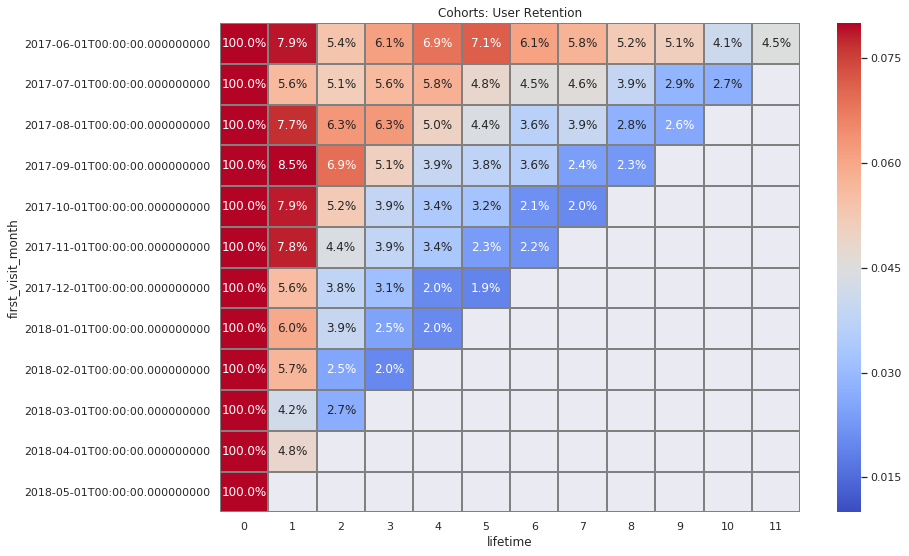

In [80]:
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmin = 0.01, vmax = 0.08, cmap='coolwarm', linewidths=1, linecolor='gray'); 

Средний Retention Rate на второй месяц «жизни» когорт составляет 5.9 %. Это означает, что 94.1 % посетителей Афиши на втором месяце "отвалились". Можно наблюдать, как почти с каждой когортой Retention Rate падает. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.

---

### 2.2. Метрики электронной коммерции

#### 2.2.1. Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;

In [81]:
visits.head()

,device,start_ts,end_ts,uid,source_id,year,month,week,day,date,session_minutes_duration,first_visit_date,first_visit_month,lifetime
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,16879256277535980062,4,2017,2017-12-01,51,20,2017-12-20,18.00,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,104060357244891740,2,2018,2018-02-01,8,19,2018-02-19,28.00,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,5,2017,2017-07-01,26,1,2017-07-01,0.00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,16174680259334210214,9,2018,2018-05-01,20,20,2018-05-20,24.00,2018-03-09,2018-03-01,2
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,3,2017,2017-12-01,52,27,2017-12-27,0.00,2017-12-27,2017-12-01,0


In [82]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Создадим новую таблицу, основанную на таблице visits, сгруппированной по первому посещению пользователя Афиши

In [83]:
first_visit = visits.groupby('uid').agg({'start_ts':'min'})\
                .rename(columns={'start_ts':'first_visit_date'})\
                .reset_index()

Создадим новую таблицу, основанную на таблице orders, сгруппированной по первой покупке пользователя Афиши

In [84]:
first_order = orders.groupby('uid').agg({'buy_ts':'min'})\
                .rename(columns={'buy_ts':'first_purchase_date'})\
                .reset_index()

Объеденим две созданные таблицы по пользователю

In [85]:
buying_time = first_visit.merge(first_order, on='uid', how='inner')

In [86]:
buying_time.head()

,uid,first_visit_date,first_purchase_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Добавим новую колонку с разницуй между первой покупкой и первым посещением пользователя в минутах

In [87]:
buying_time['buying_time'] = (buying_time['first_purchase_date'] - buying_time['first_visit_date']).dt.seconds / 60

In [88]:
buying_time.head()

,uid,first_visit_date,first_purchase_date,buying_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,"1,382.00"
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,"1,184.00"
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.00


In [89]:
buying_time['buying_time'].describe()

count   36,523.00
mean       249.16
std        429.74
min          0.00
25%          4.00
50%         16.00
75%        252.00
max      1,439.00
Name: buying_time, dtype: float64

Интересно минимальное значение равное нулю. Плучается, что первая покупка совершается одновременно с первым посещением? Видимо, такая ситуация возможна, когда заявку оформляют не на сайте магазина, а через агрегатора. Посмотрим, сколько таковых покупок имеет место быть.

In [90]:
buying_time[buying_time['buying_time'] == 0].count()

uid                    2467
first_visit_date       2467
first_purchase_date    2467
buying_time            2467
dtype: int64

In [91]:
buying_time['buying_time'].mode()

0   1.00
dtype: float64

Посмотрим на распределение частоты времени от первого визита до первых покупок

Text(0.5, 1.0, 'Распределекние времени от первого визита до первой покупки (в минутах)')

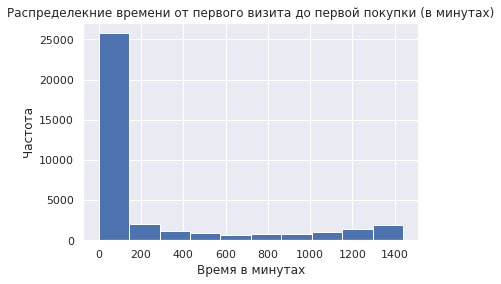

In [92]:
ax = buying_time['buying_time'].hist()
ax.set_xlabel('Время в минутах')
ax.set_ylabel('Частота')
ax.set_title('Распределекние времени от первого визита до первой покупки (в минутах)')

Распределекние времени от первого визита до первой покупки:
- Среднее время - 4 часа 9 минут;
- Медианное время - 16 минут;
- Модное время - 1 минута

---

#### 2.2.2. Применяя когортный анализ или другой метод, рассчитаем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;

In [93]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [94]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [95]:
orders.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


Выработаем алгоритм дальнейших действий:
1. Найти дату первого визита каждого покупателя (определяем его кагорту);
2. Посчитать количество уникальных покупателей по датам;
3. Посчитать количество покупок по датам;
4. Разделить количество покупок за шестой месяц на количество уникальных пользователей в этом месяце из данной когорты.

Найдём дату первого визита каждого покупателя (определим его кагорту)

In [96]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [97]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [98]:
orders_new['age'] = (
    orders_new['order_month'] - orders_new['first_order_month']
) / np.timedelta64(1, 'M')
orders_new['age'] = orders_new['age'].round().astype('int')

In [99]:
orders_new.head(30)

,buy_ts,revenue,uid,order_month,first_order_month,age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01,0
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01,0
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01,2017-06-01,0
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01,0
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,2017-06-01,0


Посчитаем количество уникальных покупателей по датам

In [100]:
cohort_sizes = (
    orders_new.groupby(['order_month','first_order_month','age'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.head()

,order_month,first_order_month,age,uid
0,2017-06-01,2017-06-01,0,2023
1,2017-07-01,2017-06-01,1,61
2,2017-07-01,2017-07-01,0,1923
3,2017-08-01,2017-06-01,2,50
4,2017-08-01,2017-07-01,1,52


Посчитаем количество покупок по датам

In [101]:
cohorts = (
    orders_new.groupby(['order_month','first_order_month','age'])
    .agg({'revenue': 'count'})
    .reset_index()
)
cohorts.head()

,order_month,first_order_month,age,revenue
0,2017-06-01,2017-06-01,0,2354
1,2017-07-01,2017-06-01,1,177
2,2017-07-01,2017-07-01,0,2186
3,2017-08-01,2017-06-01,2,174
4,2017-08-01,2017-07-01,1,100


In [102]:
report = pd.merge(cohort_sizes, cohorts, on=['order_month', 'first_order_month','age'])
report.head(10) 

,order_month,first_order_month,age,uid,revenue
0,2017-06-01,2017-06-01,0,2023,2354
1,2017-07-01,2017-06-01,1,61,177
2,2017-07-01,2017-07-01,0,1923,2186
3,2017-08-01,2017-06-01,2,50,174
4,2017-08-01,2017-07-01,1,52,100
5,2017-08-01,2017-08-01,0,1370,1533
6,2017-09-01,2017-06-01,3,54,226
7,2017-09-01,2017-07-01,2,57,120
8,2017-09-01,2017-08-01,1,58,108
9,2017-09-01,2017-09-01,0,2581,2933


In [103]:
report['orders_per_user'] = report['revenue'] / report['uid']
report.reset_index()
report.head()

,order_month,first_order_month,age,uid,revenue,orders_per_user
0,2017-06-01,2017-06-01,0,2023,2354,1.16
1,2017-07-01,2017-06-01,1,61,177,2.90
2,2017-07-01,2017-07-01,0,1923,2186,1.14
3,2017-08-01,2017-06-01,2,50,174,3.48
4,2017-08-01,2017-07-01,1,52,100,1.92


In [104]:
period_cohorts = report.query('age==5')

In [105]:
period_cohorts

,order_month,first_order_month,age,uid,revenue,orders_per_user
15,2017-11-01,2017-06-01,5,67,218,3.25
22,2017-12-01,2017-07-01,5,38,82,2.16
30,2018-01-01,2017-08-01,5,32,62,1.94
39,2018-02-01,2017-09-01,5,64,109,1.70
49,2018-03-01,2017-10-01,5,72,103,1.43
60,2018-04-01,2017-11-01,5,48,59,1.23
72,2018-05-01,2017-12-01,5,63,105,1.67


In [106]:
output = period_cohorts.pivot_table(
    index='first_order_month',
    columns='age',
    values='orders_per_user',
    aggfunc='mean'
)

output 


age,5
first_order_month,
2017-06-01,3.25
2017-07-01,2.16
2017-08-01,1.94
2017-09-01,1.70
2017-10-01,1.43
2017-11-01,1.23
2017-12-01,1.67


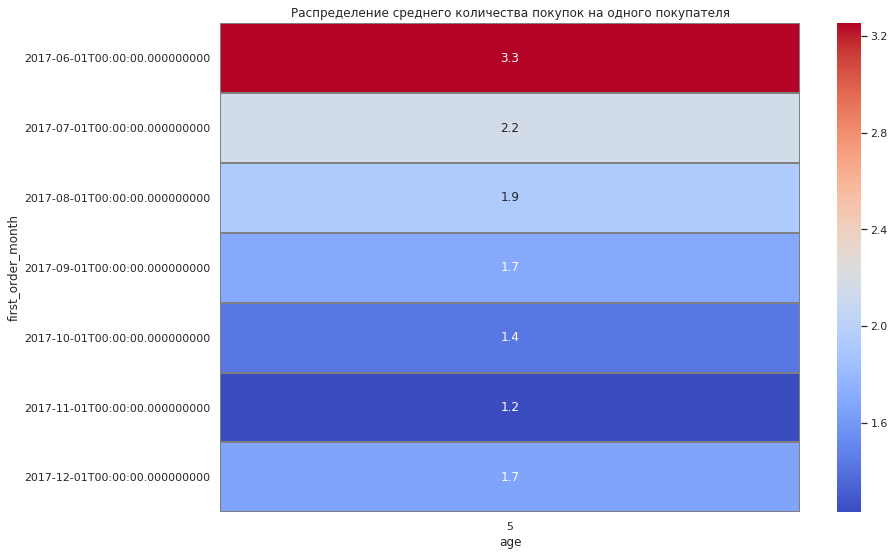

In [107]:
plt.figure(figsize=(13, 9))
plt.title('Распределение среднего количества покупок на одного покупателя')
sns.heatmap(output, annot=True, fmt='.1f', cmap='coolwarm', linewidths=1, linecolor='gray'); 

Как видим на примере шестого месяца каждой когорты, с каждой последующей когортой среднее количество покупок на одного покупателя снижается. 

---

#### 2.2.3. Рассчитаем средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Построим график, отражающий изменения метрики во времени;

In [108]:
orders_new.head()

,buy_ts,revenue,uid,order_month,first_order_month,age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0


In [109]:
orders_new['purchase_month'] = orders_new['buy_ts'].dt.month

In [110]:
orders_new['revenue'].describe()

count   50,415.00
mean         5.00
std         21.82
min          0.00
25%          1.22
50%          2.50
75%          4.89
max      2,633.28
Name: revenue, dtype: float64

In [111]:
orders_new['revenue'].mode()

0   1.83
dtype: float64

In [112]:
mean_revenue = orders_new.groupby('purchase_month').agg({'revenue': 'mean'})

In [113]:
month_lst = ['Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', \
             'Декабрь', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май']

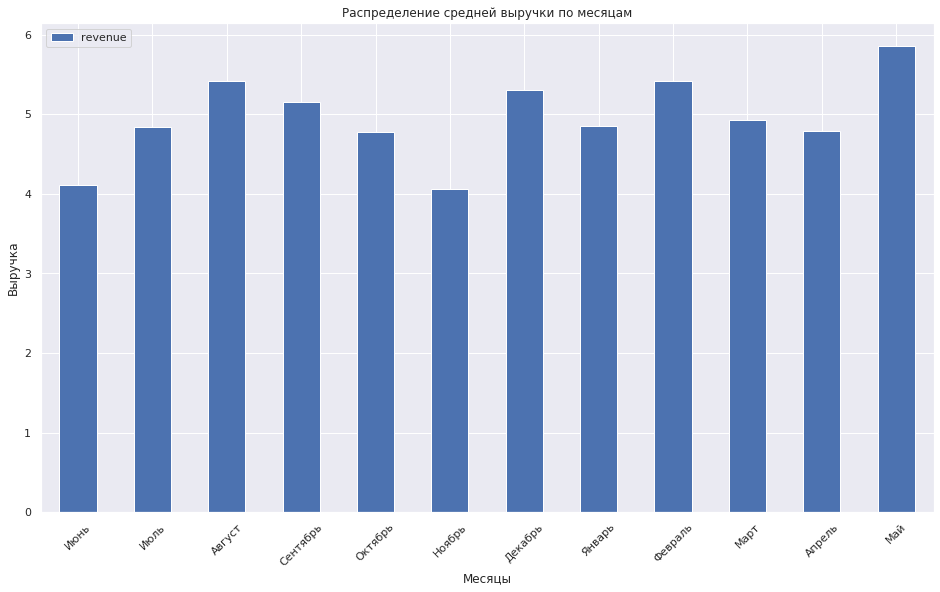

In [114]:
ax = mean_revenue.plot(kind='bar', figsize=(16, 9), grid=True)
ax.set_xticklabels(month_lst, rotation=45)
plt.title('Распределение средней выручки по месяцам')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Выручка')
plt.show()

In [115]:
mean_revenue.describe()

,revenue
count,12.00
mean,4.96
std,0.52
min,4.06
25%,4.78
50%,4.89
75%,5.33
max,5.85


Среднемесячный чек составляет 4 доллара 96 центов. Распределение по месяцам - минимальная средняя стоимость  равна 4.06 доллара (ноябрь), максимальная из средних месячных - 5.85 доллара (Май).

---

#### 2.2.4. Выясним, как меняется LTV на покупателя по когортам. Помним, что LTV — накопительная метрика. Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт будем включать когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразим изменения метрики во времени на графике;

In [116]:
orders.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


Посмотрим на распределение дат заказов:

In [117]:
orders['buy_ts'].describe() 

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

Первая покупка состоялась 1 июня 2017 года. Последняя — 1 июня 2018 года

Изучим файл с расходами:

In [118]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [119]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Диапазон дат расходов почти полностью совпадает с датами заказов. Зарабатывать Афиша закончила на 2 минуты позже, чем нести расходы.

Данные почти за год. Удобнее всего сформировать месячные когорты. Выделим месяцы из дат в таблицах с заказами и расходами. Поскольку в этих расчётах мы будем опираться на иные метрики, чем в предыдущих, имеет смысл пересчитать всё заново.

In [120]:
costs['month'] = costs['dt'].astype('datetime64[M]') 

Получим месяц первой покупки каждого покупателя:


In [121]:
orders_first = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
orders_first.columns = ['uid', 'first_order_month']
orders_first.head() 

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [122]:
sizes_cohort = (
    orders_first.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
sizes_cohort.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,order_month,first_order_month,age,uid
0,2017-06-01,2017-06-01,0,2023
1,2017-07-01,2017-06-01,1,61
2,2017-07-01,2017-07-01,0,1923
3,2017-08-01,2017-06-01,2,50
4,2017-08-01,2017-07-01,1,52


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [123]:
new_orders = pd.merge(orders,orders_first, on='uid')
new_orders.head() 

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index():

In [124]:
cohorts_month = (
    new_orders.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_month.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,"9,557.49"
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,"1,931.30"
4,2017-06-01,2017-10-01,"2,068.58"


Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [125]:
reports = pd.merge(sizes_cohort, cohorts_month, on='first_order_month')
reports.head() 

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,"9,557.49"
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,"1,931.30"
4,2017-06-01,2023,2017-10-01,"2,068.58"


Найдём валовую прибыль и возраст когорт

In [126]:
margin_rate = 1

reports['gp'] = reports['revenue'] * margin_rate
reports['age'] = (
    reports['order_month'] - reports['first_order_month']
) / np.timedelta64(1, 'M')
reports['age'] = reports['age'].round().astype('int')
reports.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,"9,557.49","9,557.49",0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,"1,931.30","1,931.30",3
4,2017-06-01,2023,2017-10-01,"2,068.58","2,068.58",4


Найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы:

In [127]:
reports['ltv'] = reports['gp'] / reports['n_buyers']

In [128]:
reports['first_order_month'] = reports['first_order_month'].astype('str')

In [129]:
all_outputs = reports.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

all_outputs.cumsum(axis=1).round(2).T

first_order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
age,,,,,,,,,,,,,
0,4.72,6.01,5.28,5.64,5.00,5.15,4.74,4.14,4.16,4.84,4.66,4.66,3.42
1,5.21,6.35,5.75,6.76,5.54,5.55,5.00,4.43,4.44,5.14,5.19,nan,nan
2,5.65,6.97,6.21,7.28,5.73,5.75,5.92,4.73,4.51,5.46,nan,nan,nan
3,6.60,7.33,6.60,11.26,5.89,6.08,6.99,4.88,4.59,nan,nan,nan,nan
4,7.62,7.50,7.09,11.66,6.04,6.23,7.30,4.94,nan,nan,nan,nan,nan
5,8.36,7.66,7.38,12.31,6.16,6.28,7.64,nan,nan,nan,nan,nan,nan
6,9.31,7.78,7.59,13.01,6.24,6.40,nan,nan,nan,nan,nan,nan,nan
7,9.89,7.92,7.99,13.25,6.36,nan,nan,nan,nan,nan,nan,nan,nan
8,10.45,8.08,8.28,13.44,nan,nan,nan,nan,nan,nan,nan,nan,nan


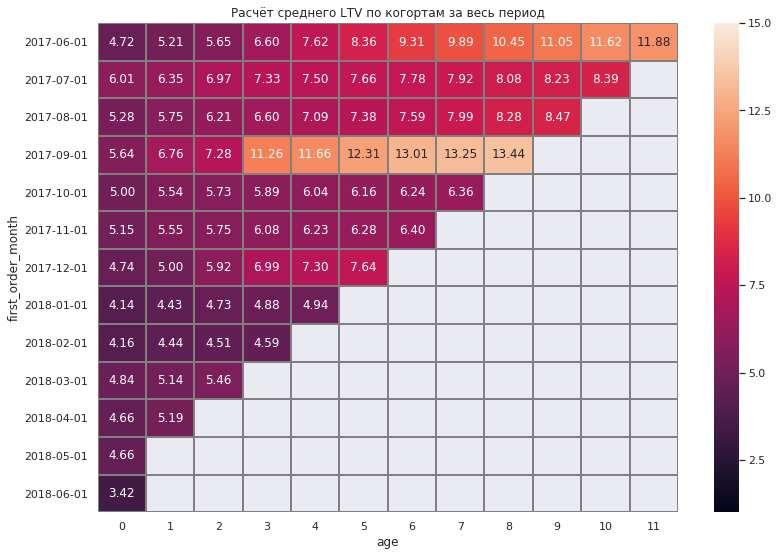

In [130]:
plt.figure(figsize=(13, 9))
plt.title('Расчёт среднего LTV по когортам за весь период')
sns.heatmap(all_outputs.cumsum(axis=1).round(2), annot=True, vmin=1, vmax=15, fmt='.2f', linewidths=1, linecolor='gray') 

In [131]:
all_outputs.cumsum(axis=1).T

first_order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
age,,,,,,,,,,,,,
0,4.72,6.01,5.28,5.64,5.00,5.15,4.74,4.14,4.16,4.84,4.66,4.66,3.42
1,5.21,6.35,5.75,6.76,5.54,5.55,5.00,4.43,4.44,5.14,5.19,nan,nan
2,5.65,6.97,6.21,7.28,5.73,5.75,5.92,4.73,4.51,5.46,nan,nan,nan
3,6.60,7.33,6.60,11.26,5.89,6.08,6.99,4.88,4.59,nan,nan,nan,nan
4,7.62,7.50,7.09,11.66,6.04,6.23,7.30,4.94,nan,nan,nan,nan,nan
5,8.36,7.66,7.38,12.31,6.16,6.28,7.64,nan,nan,nan,nan,nan,nan
6,9.31,7.78,7.59,13.01,6.24,6.40,nan,nan,nan,nan,nan,nan,nan
7,9.89,7.92,7.99,13.25,6.36,nan,nan,nan,nan,nan,nan,nan,nan
8,10.45,8.08,8.28,13.44,nan,nan,nan,nan,nan,nan,nan,nan,nan


Text(0, 0.5, 'LTV')

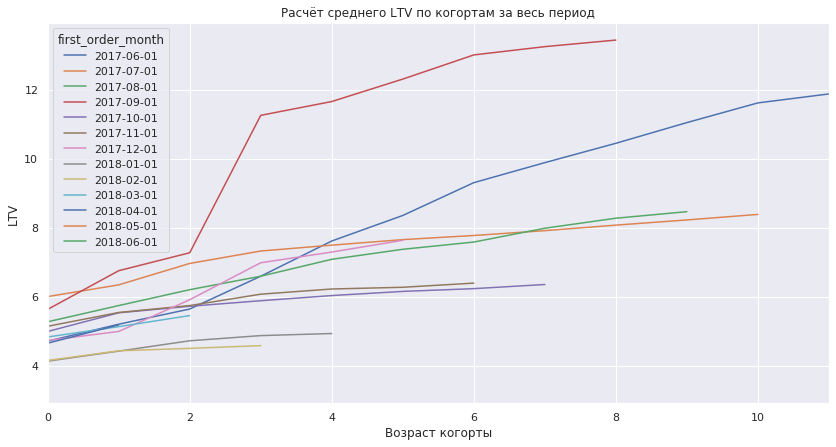

In [132]:
all_outputs.cumsum(axis=1).round(2).T.plot(kind='line', grid=True, figsize=(14,7))
plt.title('Расчёт среднего LTV по когортам за весь период')
plt.xlabel('Возраст когорты')
plt.ylabel('LTV')

Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт будем включать когорты, «прожившие» не менее 6 месяцев

In [133]:
cohorts_period = reports.query('age>5')

In [134]:
cohorts_period

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
6,2017-06-01,2023,2017-12-01,"1,922.74","1,922.74",6,0.95
7,2017-06-01,2023,2018-01-01,"1,176.56","1,176.56",7,0.58
8,2017-06-01,2023,2018-02-01,"1,119.15","1,119.15",8,0.55
9,2017-06-01,2023,2018-03-01,"1,225.51","1,225.51",9,0.61
10,2017-06-01,2023,2018-04-01,"1,155.66","1,155.66",10,0.57
11,2017-06-01,2023,2018-05-01,519.62,519.62,11,0.26
18,2017-07-01,1923,2018-01-01,231.16,231.16,6,0.12
19,2017-07-01,1923,2018-02-01,272.72,272.72,7,0.14
20,2017-07-01,1923,2018-03-01,310.05,310.05,8,0.16
21,2017-07-01,1923,2018-04-01,282.96,282.96,9,0.15


In [135]:
cohorts_period['first_order_month'] = cohorts_period['first_order_month'].astype('str')

In [136]:
outputs = cohorts_period.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

outputs.cumsum(axis=1).round(2)

age,6,7,8,9,10,11
first_order_month,,,,,,
2017-06-01,0.95,1.53,2.09,2.69,3.26,3.52
2017-07-01,0.12,0.26,0.42,0.57,0.73,nan
2017-08-01,0.21,0.62,0.91,1.10,nan,nan
2017-09-01,0.70,0.94,1.13,nan,nan,nan
2017-10-01,0.08,0.20,nan,nan,nan,nan
2017-11-01,0.11,nan,nan,nan,nan,nan


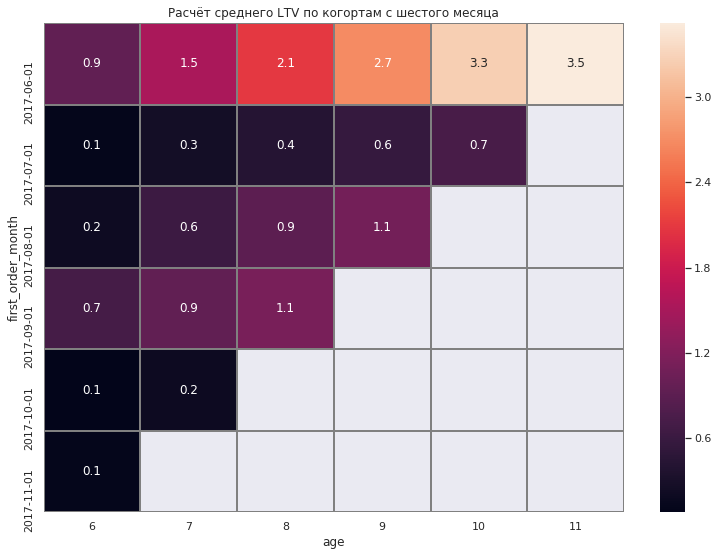

In [137]:
plt.figure(figsize=(13, 9))
plt.title('Расчёт среднего LTV по когортам с шестого месяца')
sns.heatmap(outputs.cumsum(axis=1).round(2), annot=True, fmt='.1f', linewidths=1, linecolor='gray') 

Text(0, 0.5, 'LTV')

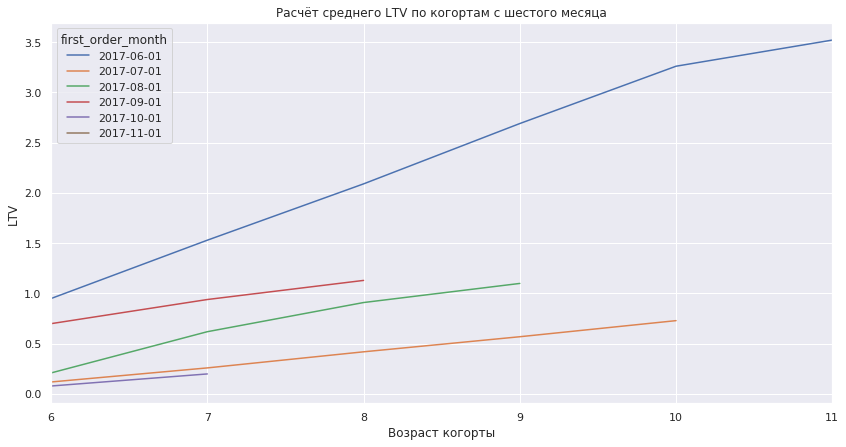

In [138]:
outputs.cumsum(axis=1).round(2).T.plot(kind='line', grid=True, figsize=(14,7))
plt.title('Расчёт среднего LTV по когортам с шестого месяца')
plt.xlabel('Возраст когорты')
plt.ylabel('LTV')

Усредним LTV всех когорт, ограниченных условиями (шесть месяцев), за каждый месяц их жизни. Узнаем, как быстро в среднем когорты окупаются. 

In [139]:
mean_ltv = outputs.cumsum(axis=1).mean(axis=0) 
mean_ltv

age
6    0.36
7    0.71
8    1.14
9    1.45
10   1.99
11   3.52
dtype: float64

Text(0, 0.5, 'Средний LTV')

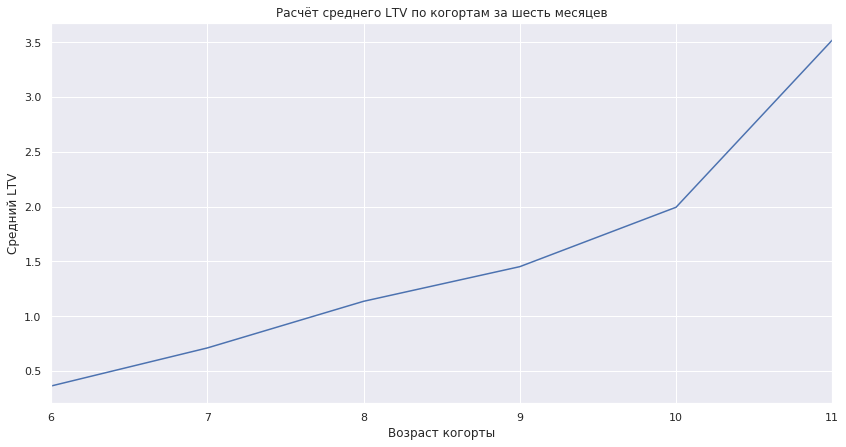

In [140]:
mean_ltv.T.plot(kind='line', grid=True, figsize=(14,7))
plt.title('Расчёт среднего LTV по когортам за шесть месяцев')
plt.xlabel('Возраст когорты')
plt.ylabel('Средний LTV')

---

### 2.3. Маркетинговые метрики

#### 2.3.1. Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени;

In [141]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


Посчитаем, сколько всего денег было затрачено.

In [142]:
costs_sum = costs['costs'].sum()
costs_sum

329131.62

Посмотрим, как траты распределены по разным рекламным источникам.

In [143]:
costs_of_source = costs.groupby('source_id')['costs'].sum().reset_index()

In [144]:
costs_of_source

,source_id,costs
0,1,"20,833.27"
1,2,"42,806.04"
2,3,"141,321.63"
3,4,"61,073.60"
4,5,"51,757.10"
5,9,"5,517.49"
6,10,"5,822.49"


Text(0, 0.5, 'Затраты (в у.е.)')

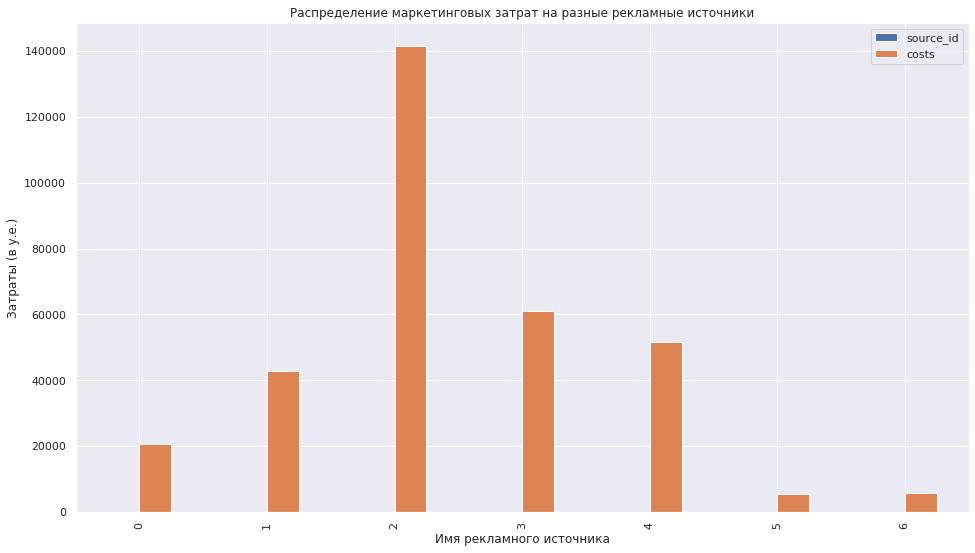

In [145]:
costs_of_source.plot(
kind='bar',
grid=True,
figsize=(16,9))
plt.title('Распределение маркетинговых затрат на разные рекламные источники')
plt.xlabel('Имя рекламного источника')
plt.ylabel('Затраты (в у.е.)')

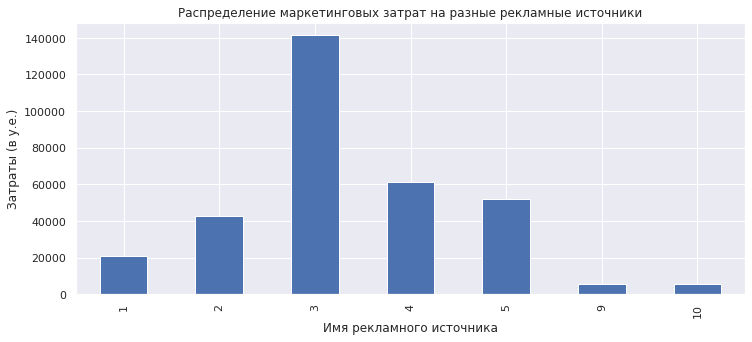

In [146]:
costs_of_source.groupby('source_id')['costs'].min().plot(kind='bar',
                                                         grid=True,
                                                         figsize=(12,5))
plt.title('Распределение маркетинговых затрат на разные рекламные источники')
plt.xlabel('Имя рекламного источника')
plt.ylabel('Затраты (в у.е.)')
plt.show()

<hr style="border: 1px solid #000;"> 

Как видим, самые высокие маркетинговые затраты пришлись на рекламный источник №3 - 141 тысяча у.е. Меньше всего на источники под №9 и №10 - 5.5 и 5.8 тысяч у.е. соответственно.

Посмотрим, как распределены траты по месяцам 

In [147]:
costs_of_month = costs.groupby('month')['costs'].sum().reset_index()
costs_of_month

,month,costs
0,2017-06-01,"18,015.00"
1,2017-07-01,"18,240.59"
2,2017-08-01,"14,790.54"
3,2017-09-01,"24,368.91"
4,2017-10-01,"36,322.88"
5,2017-11-01,"37,907.88"
6,2017-12-01,"38,315.35"
7,2018-01-01,"33,518.52"
8,2018-02-01,"32,723.03"
9,2018-03-01,"30,415.27"


In [148]:
month_lst = ['Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', \
             'Декабрь', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май']

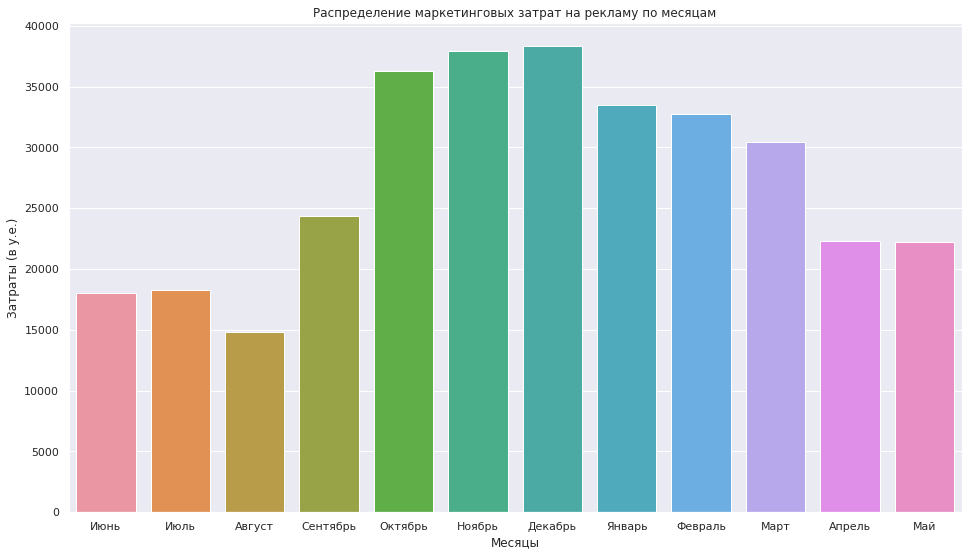

In [149]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="month", y="costs", data=costs_of_month)
ax.set_xticklabels(month_lst)
plt.title('Распределение маркетинговых затрат на рекламу по месяцам')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Затраты (в у.е.)')
plt.show()

Сопоставим этот график с посещениями Афиши

Text(0, 0.5, 'Количество посетителей')

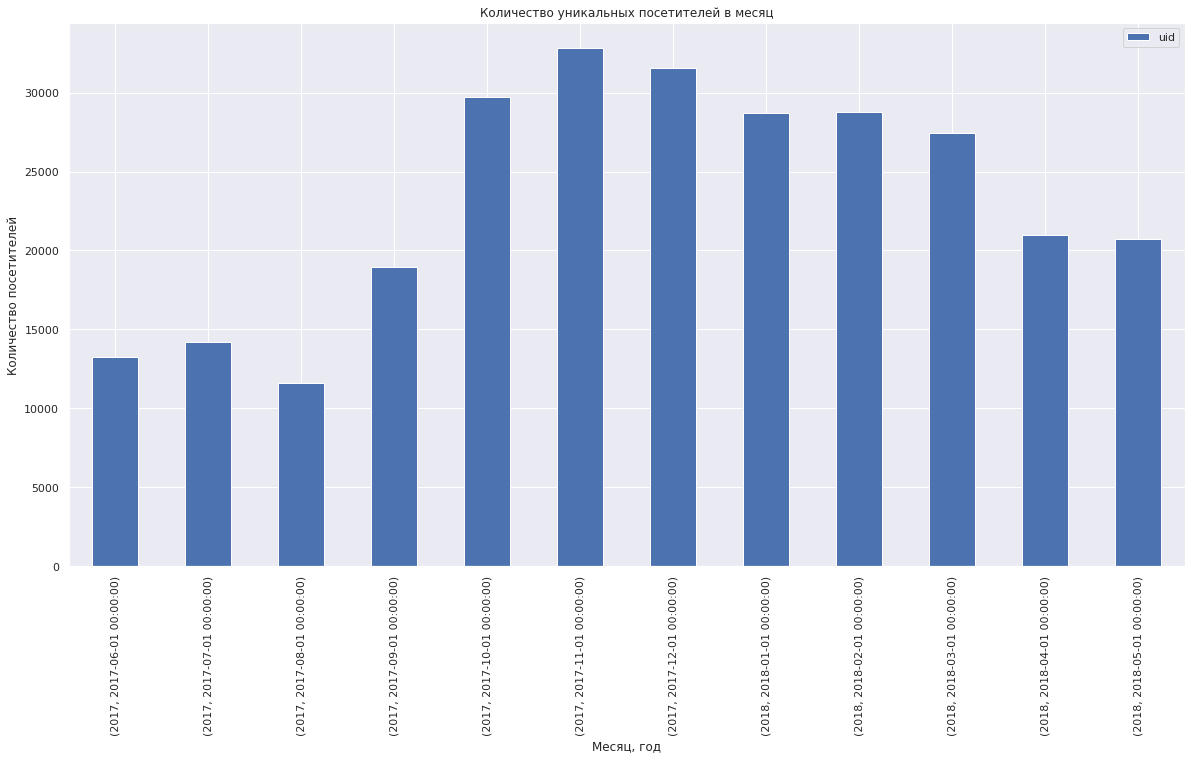

In [150]:
month_of_visit = visits.groupby(['year', 'month']).agg({'uid': 'nunique'})
month_of_visit.plot(
    kind='bar',
    grid=True,
    figsize=(20, 10))

plt.title('Количество уникальных посетителей в месяц')
plt.xlabel('Месяц, год') 
plt.ylabel('Количество посетителей')    

Судя по двум графикам, уровень рекламных затрат маркетинга прямопропорционален уровню визитов посетителей на сайт

#### 2.3.2. Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразим изменения метрик на графиках;

Создаём алгоритм дальнейших действий:

- Загружаем таблицу orders и создаем на её основе таблицу first_orders. 
- Загружаем таблицу visits и создаем на её основе таблицу с первыми источниками. 
- Объединяем эти 2 таблички
- К полученной таблице применяем агрегацию, для подсчета количества посетителей по источникам и месяцам
- Загружаем таблицу costs, применяем агрегацию, для подсчета суммы затрат по источникам и месяцам и объединяем её с таблицей из предыдущего пункта. Объединять нужно сразу по двум полям.
- Теперь остается поделить затраты на количество пользователей. 
- Группируем таблицу по источникам и усредняем затраты на пользователя.

In [151]:
orders.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [152]:
first_ord = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_ord.columns = ['uid', 'first_order_month']
first_ord

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [153]:
visits.head()

,device,start_ts,end_ts,uid,source_id,year,month,week,day,date,session_minutes_duration,first_visit_date,first_visit_month,lifetime
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,16879256277535980062,4,2017,2017-12-01,51,20,2017-12-20,18.00,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,104060357244891740,2,2018,2018-02-01,8,19,2018-02-19,28.00,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,5,2017,2017-07-01,26,1,2017-07-01,0.00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,16174680259334210214,9,2018,2018-05-01,20,20,2018-05-20,24.00,2018-03-09,2018-03-01,2
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,3,2017,2017-12-01,52,27,2017-12-27,0.00,2017-12-27,2017-12-01,0


In [154]:
new_visits = visits[['device','start_ts','end_ts','uid', 'source_id','first_visit_month']]

In [155]:
first_vis = new_visits.sort_values('start_ts').groupby('uid').first()
first_vis

,device,start_ts,end_ts,source_id,first_visit_month
uid,,,,,
11863502262781,touch,2018-03-01 17:27:00,2018-03-01 17:33:00,3,2018-03-01
49537067089222,touch,2018-02-06 15:55:00,2018-02-06 15:57:00,2,2018-02-01
297729379853735,desktop,2017-06-07 18:47:00,2017-06-07 18:48:00,3,2017-06-01
313578113262317,desktop,2017-09-18 22:49:00,2017-09-18 23:07:00,2,2017-09-01
325320750514679,desktop,2017-09-30 14:29:00,2017-09-30 14:38:00,5,2017-09-01
...,...,...,...,...,...
18446403737806311543,desktop,2017-11-30 03:36:00,2017-11-30 03:39:00,5,2017-11-01
18446424184725333426,touch,2017-12-06 20:32:00,2017-12-06 20:32:00,4,2017-12-01
18446556406699109058,touch,2018-01-01 16:29:00,2018-01-01 16:31:00,3,2018-01-01


In [156]:
vis_ord = pd.merge(first_ord, first_vis, on='uid')
vis_ord.head()

,uid,first_order_month,device,start_ts,end_ts,source_id,first_visit_month
0,313578113262317,2018-01-01,desktop,2017-09-18 22:49:00,2017-09-18 23:07:00,2,2017-09-01
1,1575281904278712,2017-06-01,touch,2017-06-03 10:13:00,2017-06-03 10:17:00,10,2017-06-01
2,2429014661409475,2017-10-01,desktop,2017-10-11 17:14:00,2017-10-11 17:27:00,3,2017-10-01
3,2464366381792757,2018-01-01,desktop,2018-01-27 20:10:00,2018-01-27 20:13:00,5,2018-01-01
4,2551852515556206,2017-11-01,desktop,2017-11-24 10:14:00,2017-11-24 10:14:19,5,2017-11-01


In [157]:
visord = vis_ord.groupby(['source_id', 'first_order_month']).agg({'uid':'nunique'}).reset_index()
visord

,source_id,first_order_month,uid
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340
...,...,...,...
81,10,2018-01-01,92
82,10,2018-02-01,123
83,10,2018-03-01,186
84,10,2018-04-01,107


In [158]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [159]:
new_costs = costs.groupby(['source_id', 'month']).agg({'costs':'sum'}).reset_index()
new_costs

,source_id,month,costs
0,1,2017-06-01,"1,125.61"
1,1,2017-07-01,"1,072.88"
2,1,2017-08-01,951.81
3,1,2017-09-01,"1,502.01"
4,1,2017-10-01,"2,315.75"
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [160]:
df = pd.merge(visord, new_costs, left_on=['source_id', 'first_order_month'], right_on=['source_id', 'month'])
df

,source_id,first_order_month,uid,month,costs
0,1,2017-06-01,190,2017-06-01,"1,125.61"
1,1,2017-07-01,160,2017-07-01,"1,072.88"
2,1,2017-08-01,113,2017-08-01,951.81
3,1,2017-09-01,227,2017-09-01,"1,502.01"
4,1,2017-10-01,340,2017-10-01,"2,315.75"
...,...,...,...,...,...
79,10,2018-01-01,92,2018-01-01,614.35
80,10,2018-02-01,123,2018-02-01,480.88
81,10,2018-03-01,186,2018-03-01,526.41
82,10,2018-04-01,107,2018-04-01,388.25


In [161]:
df['cac'] = df['costs'] / df['uid']
df

,source_id,first_order_month,uid,month,costs,cac
0,1,2017-06-01,190,2017-06-01,"1,125.61",5.92
1,1,2017-07-01,160,2017-07-01,"1,072.88",6.71
2,1,2017-08-01,113,2017-08-01,951.81,8.42
3,1,2017-09-01,227,2017-09-01,"1,502.01",6.62
4,1,2017-10-01,340,2017-10-01,"2,315.75",6.81
...,...,...,...,...,...,...
79,10,2018-01-01,92,2018-01-01,614.35,6.68
80,10,2018-02-01,123,2018-02-01,480.88,3.91
81,10,2018-03-01,186,2018-03-01,526.41,2.83
82,10,2018-04-01,107,2018-04-01,388.25,3.63


In [162]:
source_by_mean = df.groupby('source_id').agg({'cac':'mean'}).reset_index()
source_by_mean

,source_id,cac
0,1,7.21
1,2,12.50
2,3,13.80
3,4,6.44
4,5,7.45
5,9,5.41
6,10,4.87


Text(0, 0.5, 'Затраты на одного пользователя')

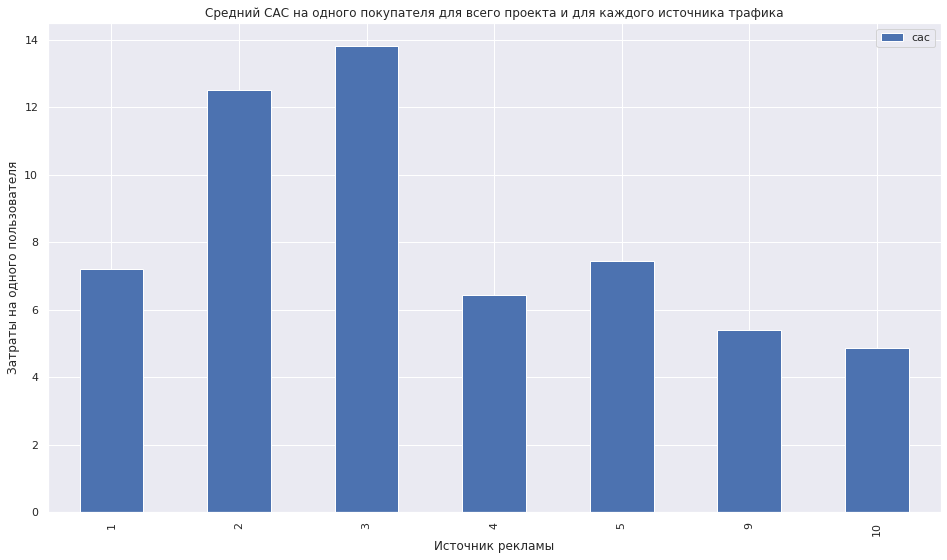

In [163]:
source_by_mean.plot(
kind='bar',
x='source_id',
y='cac',
grid=True,
figsize=(16,9))
plt.title('Средний CAC на одного покупателя для всего проекта и для каждого источника трафика')
plt.xlabel('Источник рекламы')
plt.ylabel('Затраты на одного пользователя')


Самая высокая стоимость привлечения одного клиента соответствует третьему рекламному источнику, самая низкая - десятому.

---

#### 2.3.3. Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. Обратим внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Построим графики, отражающие изменения метрик во времени.

In [164]:
visits.head()

,device,start_ts,end_ts,uid,source_id,year,month,week,day,date,session_minutes_duration,first_visit_date,first_visit_month,lifetime
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,16879256277535980062,4,2017,2017-12-01,51,20,2017-12-20,18.00,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,104060357244891740,2,2018,2018-02-01,8,19,2018-02-19,28.00,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,5,2017,2017-07-01,26,1,2017-07-01,0.00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,16174680259334210214,9,2018,2018-05-01,20,20,2018-05-20,24.00,2018-03-09,2018-03-01,2
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,3,2017,2017-12-01,52,27,2017-12-27,0.00,2017-12-27,2017-12-01,0


In [165]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source.reset_index()

,source_id,costs
0,1,"20,833.27"
1,2,"42,806.04"
2,3,"141,321.63"
3,4,"61,073.60"
4,5,"51,757.10"
5,9,"5,517.49"
6,10,"5,822.49"


In [166]:
visits_by_source = visits.query('start_ts == first_visit_date')

In [167]:
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
revenue_by_source.reset_index()

,source_id,revenue
0,1,"49,135.61"
1,2,"71,226.19"
2,3,"58,056.13"
3,4,"60,759.98"
4,5,"64,625.13"
5,7,1.22
6,9,"6,048.58"
7,10,"5,494.15"


In [168]:
roi = revenue_by_source.join(costs_by_source)
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs'] 
roi

,revenue,costs,roi
source_id,,,
1,"49,135.61","20,833.27",1.36
2,"71,226.19","42,806.04",0.66
3,"58,056.13","141,321.63",-0.59
4,"60,759.98","61,073.60",-0.01
5,"64,625.13","51,757.10",0.25
7,1.22,nan,nan
9,"6,048.58","5,517.49",0.10
10,"5,494.15","5,822.49",-0.06


In [169]:
roi.sort_values('roi', ascending = False)

,revenue,costs,roi
source_id,,,
1,"49,135.61","20,833.27",1.36
2,"71,226.19","42,806.04",0.66
5,"64,625.13","51,757.10",0.25
9,"6,048.58","5,517.49",0.10
4,"60,759.98","61,073.60",-0.01
10,"5,494.15","5,822.49",-0.06
3,"58,056.13","141,321.63",-0.59
7,1.22,nan,nan


Лучший по окупаемости - источник №1.

In [170]:
revenue_by_source_and_device = (orders.merge(visits_by_source, on='uid', how='inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue':'sum'})

In [171]:
revenue_by_source_and_device = revenue_by_source_and_device.reset_index()

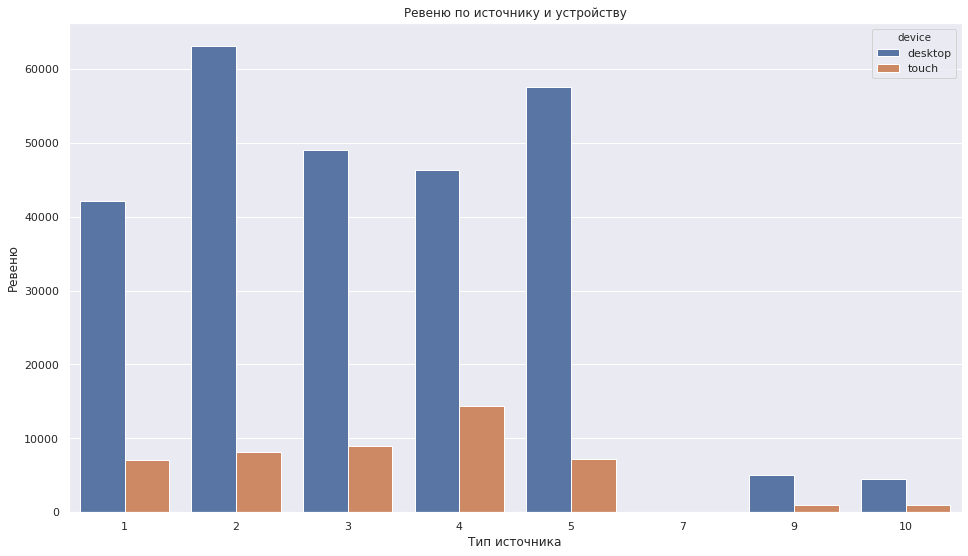

In [172]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="revenue", hue="device", data=revenue_by_source_and_device)
plt.title('Ревеню по источнику и устройству')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Ревеню')
plt.show()

### Выводы и рекомендации

Средний Retention Rate на второй месяц «жизни» когорт составляет 5.9 %. Это означает, что 94.1 % посетителей Афиши на втором месяце "отвалились". Можно наблюдать, как почти с каждой когортой Retention Rate падает. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.



Распределекние времени от первого визита до первой покупки:

- Среднее время - 4 часа 9 минут;
- Медианное время - 16 минут;
- Модное время - 1 минута

На примере шестого месяца каждой когорты видно, что, с каждой последующей когортой среднее количество покупок на одного покупателя снижается.

Среднемесячный чек составляет 4 доллара 96 центов. Распределение по месяцам - минимальная средняя стоимость равна 4.06 доллара (ноябрь), максимальная из средних месячных - 5.85 доллара (Май).


Самые высокие маркетинговые затраты пришлись на рекламный источник №3 - 141 тысяча у.е. Меньше всего на источники под №9 и №10 - 5.5 и 5.8 тысяч у.е. соответственно.


Самая высокая стоимость привлечения одного клиента соответствует третьему рекламному источнику, самая низкая - десятому.

При этом самый высокий показатель ROI демонстрирует рекламный источник № 1

Посетители, пришедшие с устройства decktop пока демонстрируют гораздо большую прибыльность по сравнению с touch.